# Datasets gemeenteraadsverkiezingen 2022
Deze notebook heeft als doel de stemlokalen van de gemeenteraadsverkiezingen van 2022 te analyseren. Er zal hier stap voor stap door de data gelopen worden om het proces reproduceerbaar te maken voor latere verkiezingen. De eerste stap was de data ophalen van de bronnen, zowel van de overheid als van 'Waar is mijn stemlokaal' (voor geografische data van de stemlokalen). Deze bronnen zijn voor de verkiezingen van 2022 gebruikt:
- [Verkiezingsuitslagen Gemeenteraad 2022](https://data.overheid.nl/dataset/08b04bec-3332-4c76-bb0c-68bfaeb5df43)
  - [Directe link naar uitslagen per gemeente EML](https://data.overheid.nl/sites/default/files/dataset/08b04bec-3332-4c76-bb0c-68bfaeb5df43/resources/GR2022_2022-03-29T15.14.zip)
  - [Directe link naar kandidatenlijst met uitslagen CSV](https://data.overheid.nl/sites/default/files/dataset/08b04bec-3332-4c76-bb0c-68bfaeb5df43/resources/GR2022_alle-kandidaten_2022-02-22T08.34.csv)
- ['Waar is mijn stemlokaal' stembureau data](https://waarismijnstemlokaal.nl/data)
  - [Directe link naar 'Waar is mijn stemlokaal' gemeenteraad 2022 CSV (CKAN)](https://ckan.dataplatform.nl/datastore/dump/d6a1b4c4-73c8-457b-9b75-a38428bded68)
  - [Verkiezingsuitslagen gemeenteraadsverkiezingen 2022 geodata vab Open State Foundation en de Volkskrant (OSF/VK)](https://data.openstate.eu/dataset/verkiezingsuitslagen-gemeenteraadsverkiezingen-2022)
    - [Directe link naar GeoJSON bestand](https://data.openstate.eu/dataset/a1767f1b-bf0c-409b-b3b1-3af9954b57f4/resource/413be255-5070-48f4-b631-895097976abb/download/2022gr.geo.json)
- [CBS Wijk- en buurtkaart 2021](https://www.cbs.nl/nl-nl/dossier/nederland-regionaal/geografische-data/wijk-en-buurtkaart-2021)
  - [Directe link naar zip bestand met SHP bestand er in](https://www.cbs.nl/-/media/cbs/dossiers/nederland-regionaal/wijk-en-buurtstatistieken/wijkbuurtkaart_2021_v1.zip)
- [CBS bevolkingsdichtheid kaart 100 bij 100 meter](https://www.cbs.nl/nl-nl/dossier/nederland-regionaal/geografische-data/kaart-van-100-meter-bij-100-meter-met-statistieken)
  - [Directe link naar 7z bestand met SHP bestand er in](https://www.cbs.nl/-/media/cbs/dossiers/nederland-regionaal/vierkanten/100/nl_vierkant_100meter_bij_100meter.7z)
- [CBS bevolkingsdichtheid kaart 500 bij 500 meter](https://www.cbs.nl/nl-nl/dossier/nederland-regionaal/geografische-data/kaart-van-500-meter-bij-500-meter-met-statistieken)
  - [Directe link naar 7z bestand met SHP bestand er in](https://www.cbs.nl/-/media/cbs/dossiers/nederland-regionaal/vierkanten/500/2021-cbs_vk500_2020_v1.zip)
- [CBS schatting van kiesgerechtigden per gemeente](https://www.cbs.nl/nl-nl/maatwerk/2020/52/schatting-van-het-aantal-kiesgerechtigden-in-nederland)

# Data inladen en eerste analyse
## OSF/VK GeoJSON dataset: verkiezingsuitslagen per stembureau inclusief coördinaten
Als eerste importeren we de data voor de analyse, daarna kunnen we kijken hoe goed de data is, hoe we het aan kunnen vullen, en wat er mee te doen. We kijken eerst naar het GeoJSON bestand van Open State Foundation en de Volkskrant (OSF/VK). Daarin zijn de coördinaten van alle locaties van bijna alle stembureaus toegevoegd aan de lijst met stembureaus uit de officiële uitslagen zoals gepubliceerd door de Kiesraad. We kunnen een GeoJSON bestand direct inladen met geopandas.

In [72]:
import pandas as pd
import geopandas as gpd

crs = {'init':'EPSG:4326'}
df_geojson = gpd.read_file(r'../data/2022gr.geo.json', crs=crs)

/home/lillian/.conda/envs/stembureaus/lib/python3.10/site-packages/fiona/collection.py:208: FeatureWarning: Empty field name at index 928
  self._schema = self.session.get_schema()
/home/lillian/.conda/envs/stembureaus/lib/python3.10/site-packages/geopandas/geodataframe.py:600: UserWarning: Empty field name at index 928
  for feature in features_lst:


## CBS dataset: gemeentegrenzen en informatie
We importeren nu de gemeente shapefile kaart van het CBS, om de overlay van onze stemlokalen eroverheen te leggen.

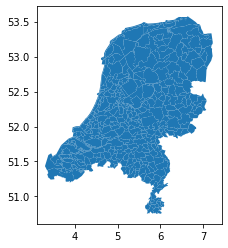

In [73]:
nl_map = gpd.read_file(r'../data/shape/Netherlands_shapefile/gemeente_2021_v1.shp')
plot = nl_map.to_crs(epsg=4326).plot()
plot.set_title('Plot van de gemeenten uit de CBS Wijk- en buurtkaart 2021')
plot


De CBS Wijk- en buurtkaart 2021 bevat ook naast de gemeentegrenzen ook informatie (bv. aantal inwoners) over de gemeenten. We printen dat hier uit om daar een beeld van te krijgen.

In [74]:
print(nl_map)

    GM_CODE            GM_NAAM  H2O       OAD      STED  BEV_DICHTH  AANT_INW  \
0    GM0034             Almere   JA -99999999 -99999999   -99999999 -99999999   
1    GM0050           Zeewolde   JA -99999999 -99999999   -99999999 -99999999   
2    GM0060            Ameland   JA -99999999 -99999999   -99999999 -99999999   
3    GM0072          Harlingen   JA -99999999 -99999999   -99999999 -99999999   
4    GM0088    Schiermonnikoog   JA -99999999 -99999999   -99999999 -99999999   
..      ...                ...  ...       ...       ...         ...       ...   
430  GM1966       Het Hogeland  NEE       414         5          99     47834   
431  GM1969     Westerkwartier  NEE       476         5         176     63678   
432  GM1970  Noardeast-Fryslân  NEE       463         5         120     45481   
433  GM1978        Molenlanden  NEE       393         5         243     44130   
434  GM1979          Eemsdelta  NEE       692         4         170     45587   

     AANT_MAN  AANT_VROUW  

Hieronder plotten we de gegevens van stembureaus op de kaart van het CBS:

Text(0.5,1,'Stembureaus op de gemeentekaart van het CBS')

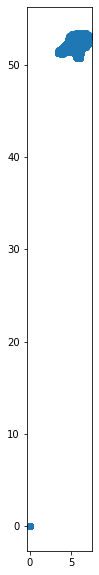

In [75]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10,10))
nl_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
df_geojson.plot(ax=ax)
ax.set_title('Stembureaus op de gemeentekaart van het CBS')

We hebben hier een probleem dat sommige punten de coördinaten 0,0 hebben, dit is niet iets wat we willen weergeven. Laten we eerst kijken waarom dit het geval is in de data voordat we het er helemaal uithalen.

In [76]:
for index, row in df_geojson.iterrows():
    if (row.geometry.centroid.x == 0.00000):
        print(row)

Stembureau                                     32
Adres                                            
Locatie                                      SB32
description        Stembureau Mobiel Stembureau 1
Geldige stemmen                                99
                                ...              
één-Ermelo                                    NaN
gmcode                                     GM0109
election                         GR2022_Coevorden
electionName          Gemeenteraad Coevorden 2022
geometry                              POINT (0 0)
Name: 2520, Length: 973, dtype: object
Stembureau                                     33
Adres                                            
Locatie                                      SB33
description        Stembureau Mobiel Stembureau 2
Geldige stemmen                               115
                                ...              
één-Ermelo                                    NaN
gmcode                                     GM0109
election   

Het zijn dus duidelijk allemaal mobiele stemlokalen, die kunnen we in een aparte dataset houden voor later, voor nu zijn ze onbelangrijk voor de kaartweergave, laten we de dataset dus opsplitsen in drie dataframes, de originele, één frame zonder de mobiele stemlokalen, en de mobiele stemlokalen alleen.

In [77]:
# De waarschuwing over de projectie die niet klopt kan genegeerd worden, we zoeken naar data die x = 0 is,
# de projectie gaat geen effect hebben op die data in Nederland.

# Filter de data en print welke waardes 0 hebben op x.
mobiel_mask = df_geojson['geometry'].centroid.x == 0
i = 0
for item in mobiel_mask:
    if item:
        print(i)
    i = i + 1

/tmp/ipykernel_112022/291552514.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """


2520
2521
2918
3579
3580
3581
3582
3583
5494
5784
5785
6260
6261
6738
6739
6863
7348
7364
7857
7912
7913
7923
7924
7926
7958
7959
7960
8108
8109
8161
8162
8163
8318
9093
9151
9152
9153
9661
9853
10427
10431
10497
10498
10525
10526
10527
10528
10623
10624
10894
10895
11032
11101
12038
12039
12053
12054
12118
12119
12120
12121
12504
12505
12506


In [78]:
df_geojson_clean = df_geojson[~mobiel_mask]
df_geojson_mobiel = df_geojson[mobiel_mask]
print(df_geojson_clean)

       Stembureau   Adres Locatie  \
0               1  9461BH     SB1   
1               2  9461DA     SB2   
2               3  9461JA     SB3   
3               4  9451KD     SB4   
4               6  9454PL     SB6   
...           ...     ...     ...   
12591         703  5391AR   SB703   
12592         705  5391AR   SB705   
12593         750  5382KE   SB750   
12594         751  5382KE   SB751   
12595         752  5283KE   SB752   

                                             description  Geldige stemmen  \
0      Stembureau Gemeentehuis Gieten (postcode: 9461...              784   
1              Stembureau OBS Gieten (postcode: 9461 DA)              562   
2      Stembureau Zorgcentrum Dekelhem (postcode: 946...              566   
3      Stembureau Ontmoetingscentrum Boerhorn Rolde (...             1495   
4      Stembureau Dropshuis de Eekhof (postcode: 9454...              347   
...                                                  ...              ...   
12591  Stemburea

In [79]:
# Let's also check if none fell through the cracks, it might be some mobile polls did actually have a location
# posted erroneously
#mobiel_mask_name = df_geojson_clean['description'].str.contains('Mobiel')
#df_geojson_clean = df_geojson_clean[~mobiel_mask_name]
#df_geojson_clean

## 'Waar is mijn stemlokaal' dataset (wims)

In [86]:
df_wims = pd.read_csv(r'../data/wims-3.csv')
df_wims

_id      Gemeente CBS gemeentecode  Nummer stembureau  \
0         1  Valkenswaard           GM0858                  1   
1         2  Valkenswaard           GM0858                  2   
2         3  Valkenswaard           GM0858                  3   
3         4  Valkenswaard           GM0858                  4   
4         5  Valkenswaard           GM0858                  5   
...     ...           ...              ...                ...   
9270  38745        Gennep           GM0907                  4   
9271  38746        Gennep           GM0907                  5   
9272  38747        Gennep           GM0907                  6   
9273  38748        Gennep           GM0907                  8   
9274  38749        Gennep           GM0907                  1   

                        Naam stembureau     Gebruiksdoel van het gebouw  \
0                 Zorgcentrum Kempenhof          gezondheidszorgfunctie   
1                Buurtgebouw De Horizon              bijeenkomstfunctie   
2                   Speeltuin Geenhoven              bijeenkomstfunctie   
3     Ontmoetingscentrum De zoete inval              bijeenkomstfunctie   
4             Gymnastiekzaal 't Gegraaf                    sportfunctie   
...                                 ...                             ...   
9270                         Het Hökske              bijeenkomstfunctie   
9271                   Buurthuis VanOns              bijeenkomstfunctie   
9272                        't Trefpunt              bijeenkomstfunctie   
9273                        De Uitkomst              bijeenkomstfunctie   
9274                       Zaal Buurman  woonfunctie,bijeenkomstfunctie   

                Website locatie Wijknaam  CBS wijknummer  Buurtnaam  ...  \
0     https://www.valkenhof.nl/      NaN             NaN        NaN  ...   
1                           NaN      NaN             NaN        NaN  ...   
2                           NaN      NaN             NaN        NaN  ...   
3                           NaN      NaN             NaN        NaN  ...   
4                           NaN      NaN             NaN        NaN  ...   
...                         ...      ...             ...        ...  ...   
9270                        NaN      NaN             NaN        NaN  ...   
9271                        NaN      NaN             NaN        NaN  ...   
9272                        NaN      NaN             NaN        NaN  ...   
9273                        NaN      NaN             NaN        NaN  ...   
9274                        NaN      NaN             NaN        NaN  ...   

      Kieskring ID  Hoofdstembureau Tellocatie  \
0     Valkenswaard     Valkenswaard        NaN   
1     Valkenswaard     Valkenswaard        NaN   
2     Valkenswaard     Valkenswaard        NaN   
3     Valkenswaard     Valkenswaard        NaN   
4     Valkenswaard     Valkenswaard        NaN   
...            ...              ...        ...   
9270        Gennep           Gennep         ja   
9271        Gennep           Gennep         ja   
9272        Gennep           Gennep         ja   
9273        Gennep           Gennep         ja   
9274        Gennep           Gennep        NaN   

                               Contactgegevens gemeente  \
0                          verkiezingen@valkenswaard.nl   
1                          verkiezingen@valkenswaard.nl   
2                          verkiezingen@valkenswaard.nl   
3                          verkiezingen@valkenswaard.nl   
4                          verkiezingen@valkenswaard.nl   
...                                                 ...   
9270  Klantcontactcentrum gemeente Gennep gemeente@g...   
9271  Klantcontactcentrum gemeente Gennep gemeente@g...   
9272  Klantcontactcentrum gemeente Gennep gemeente@g...   
9273  Klantcontactcentrum gemeente Gennep gemeente@g...   
9274  Klantcontactcentrum gemeente Gennep gemeente@g...   

                  Verkiezingswebsite gemeente Verkiezingen  \
0     http://www.valkenswaard.nl/verkiezi

In [87]:
# Convert the wims data to a geopandas dataframe
gdf_wims = gpd.GeoDataFrame(
    df_wims,
    geometry=gpd.points_from_xy(df_wims.Longitude, df_wims.Latitude)
).set_crs(epsg=4326, inplace=True)

gdf_wims

_id      Gemeente CBS gemeentecode  Nummer stembureau  \
0         1  Valkenswaard           GM0858                  1   
1         2  Valkenswaard           GM0858                  2   
2         3  Valkenswaard           GM0858                  3   
3         4  Valkenswaard           GM0858                  4   
4         5  Valkenswaard           GM0858                  5   
...     ...           ...              ...                ...   
9270  38745        Gennep           GM0907                  4   
9271  38746        Gennep           GM0907                  5   
9272  38747        Gennep           GM0907                  6   
9273  38748        Gennep           GM0907                  8   
9274  38749        Gennep           GM0907                  1   

                        Naam stembureau     Gebruiksdoel van het gebouw  \
0                 Zorgcentrum Kempenhof          gezondheidszorgfunctie   
1                Buurtgebouw De Horizon              bijeenkomstfunctie   
2                   Speeltuin Geenhoven              bijeenkomstfunctie   
3     Ontmoetingscentrum De zoete inval              bijeenkomstfunctie   
4             Gymnastiekzaal 't Gegraaf                    sportfunctie   
...                                 ...                             ...   
9270                         Het Hökske              bijeenkomstfunctie   
9271                   Buurthuis VanOns              bijeenkomstfunctie   
9272                        't Trefpunt              bijeenkomstfunctie   
9273                        De Uitkomst              bijeenkomstfunctie   
9274                       Zaal Buurman  woonfunctie,bijeenkomstfunctie   

                Website locatie Wijknaam  CBS wijknummer  Buurtnaam  ...  \
0     https://www.valkenhof.nl/      NaN             NaN        NaN  ...   
1                           NaN      NaN             NaN        NaN  ...   
2                           NaN      NaN             NaN        NaN  ...   
3                           NaN      NaN             NaN        NaN  ...   
4                           NaN      NaN             NaN        NaN  ...   
...                         ...      ...             ...        ...  ...   
9270                        NaN      NaN             NaN        NaN  ...   
9271                        NaN      NaN             NaN        NaN  ...   
9272                        NaN      NaN             NaN        NaN  ...   
9273                        NaN      NaN             NaN        NaN  ...   
9274                        NaN      NaN             NaN        NaN  ...   

      Hoofdstembureau  Tellocatie  \
0        Valkenswaard         NaN   
1        Valkenswaard         NaN   
2        Valkenswaard         NaN   
3        Valkenswaard         NaN   
4        Valkenswaard         NaN   
...               ...         ...   
9270           Gennep          ja   
9271           Gennep          ja   
9272           Gennep          ja   
9273           Gennep          ja   
9274           Gennep         NaN   

                               Contactgegevens gemeente  \
0                          verkiezingen@valkenswaard.nl   
1                          verkiezingen@valkenswaard.nl   
2                          verkiezingen@valkenswaard.nl   
3                          verkiezingen@valkenswaard.nl   
4                          verkiezingen@valkenswaard.nl   
...                                                 ...   
9270  Klantcontactcentrum gemeente Gennep gemeente@g...   
9271  Klantcontactcentrum gemeente Gennep gemeente@g...   
9272  Klantcontactcentrum gemeente Gennep gemeente@g...   
9273  Klantcontactcentrum gemeente Gennep gemeente@g...   
9274  Klantcontactcentrum gemeente Gennep gemeente@g...   

                  Verkiezingswebsite gemeente Verkiezingen  \
0     http://www.valkenswaard.nl/verkiezingen          NaN   
1     http://www.valkenswaard.nl/verkiezingen          NaN   
2     http://www.valkenswaard.nl/verkiezingen          NaN   
3     http:

In [88]:
# We only want to analyse stemlokalen so deduplicate the stembureaus based on their location's coordinates
gdf_wims_dedupe = gdf_wims.drop_duplicates(subset="geometry", keep=False)
df_geojson_dedupe = df_geojson_clean.drop_duplicates(subset="geometry", keep=False)
gdf_wims_dedupe

_id      Gemeente CBS gemeentecode  Nummer stembureau  \
0         1  Valkenswaard           GM0858                  1   
1         2  Valkenswaard           GM0858                  2   
2         3  Valkenswaard           GM0858                  3   
3         4  Valkenswaard           GM0858                  4   
4         5  Valkenswaard           GM0858                  5   
...     ...           ...              ...                ...   
9270  38745        Gennep           GM0907                  4   
9271  38746        Gennep           GM0907                  5   
9272  38747        Gennep           GM0907                  6   
9273  38748        Gennep           GM0907                  8   
9274  38749        Gennep           GM0907                  1   

                        Naam stembureau     Gebruiksdoel van het gebouw  \
0                 Zorgcentrum Kempenhof          gezondheidszorgfunctie   
1                Buurtgebouw De Horizon              bijeenkomstfunctie   
2                   Speeltuin Geenhoven              bijeenkomstfunctie   
3     Ontmoetingscentrum De zoete inval              bijeenkomstfunctie   
4             Gymnastiekzaal 't Gegraaf                    sportfunctie   
...                                 ...                             ...   
9270                         Het Hökske              bijeenkomstfunctie   
9271                   Buurthuis VanOns              bijeenkomstfunctie   
9272                        't Trefpunt              bijeenkomstfunctie   
9273                        De Uitkomst              bijeenkomstfunctie   
9274                       Zaal Buurman  woonfunctie,bijeenkomstfunctie   

                Website locatie Wijknaam  CBS wijknummer  Buurtnaam  ...  \
0     https://www.valkenhof.nl/      NaN             NaN        NaN  ...   
1                           NaN      NaN             NaN        NaN  ...   
2                           NaN      NaN             NaN        NaN  ...   
3                           NaN      NaN             NaN        NaN  ...   
4                           NaN      NaN             NaN        NaN  ...   
...                         ...      ...             ...        ...  ...   
9270                        NaN      NaN             NaN        NaN  ...   
9271                        NaN      NaN             NaN        NaN  ...   
9272                        NaN      NaN             NaN        NaN  ...   
9273                        NaN      NaN             NaN        NaN  ...   
9274                        NaN      NaN             NaN        NaN  ...   

      Hoofdstembureau  Tellocatie  \
0        Valkenswaard         NaN   
1        Valkenswaard         NaN   
2        Valkenswaard         NaN   
3        Valkenswaard         NaN   
4        Valkenswaard         NaN   
...               ...         ...   
9270           Gennep          ja   
9271           Gennep          ja   
9272           Gennep          ja   
9273           Gennep          ja   
9274           Gennep         NaN   

                               Contactgegevens gemeente  \
0                          verkiezingen@valkenswaard.nl   
1                          verkiezingen@valkenswaard.nl   
2                          verkiezingen@valkenswaard.nl   
3                          verkiezingen@valkenswaard.nl   
4                          verkiezingen@valkenswaard.nl   
...                                                 ...   
9270  Klantcontactcentrum gemeente Gennep gemeente@g...   
9271  Klantcontactcentrum gemeente Gennep gemeente@g...   
9272  Klantcontactcentrum gemeente Gennep gemeente@g...   
9273  Klantcontactcentrum gemeente Gennep gemeente@g...   
9274  Klantcontactcentrum gemeente Gennep gemeente@g...   

                  Verkiezingswebsite gemeente Verkiezingen  \
0     http://www.valkenswaard.nl/verkiezingen          NaN   
1     http://www.valkenswaard.nl/verkiezingen          NaN   
2     http://www.valkenswaard.nl/verkiezingen          NaN   
3     http:

Voor dit onderzoek zijn we enkel geïnteresseerd in de locaties van stembureaus, oftewel de stemlokalen. Hierboven hebben we de stembureaus uit de wims dataset gededupliceerd op basis van de coördinaten van hun locatie.

Het aantal stembureaus: 9275

Het aantal stemlokalen: 8089

Er zijn dus 1186 stembureaus gevestigd op een locatie van minimaal één ander stembureau.

## Plots van alle stemlokalen op de kaart
### Stemlokalen uit de wims dataset

In [89]:
fig, ax = plt.subplots(figsize = (15,15))
nl_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
gdf_wims_dedupe.plot(ax=ax)

ValueError: 'box_aspect' and 'fig_aspect' must be positive

ValueError: 'box_aspect' and 'fig_aspect' must be positive

### Stemlokalen uit de OSF/VK GeoJSON dataset

<AxesSubplot:>

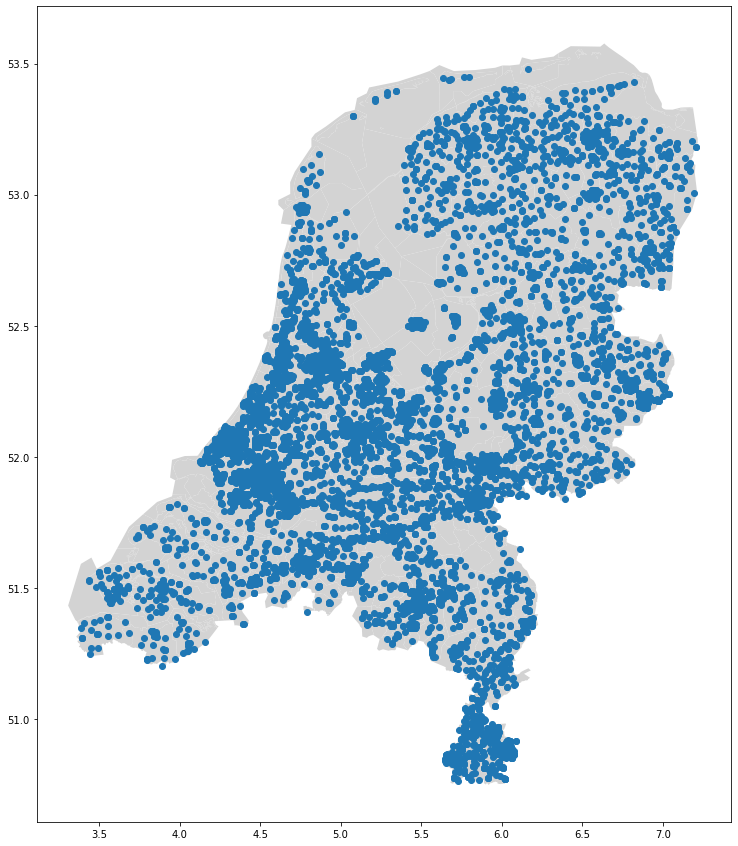

In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
nl_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
df_geojson_clean.plot(ax=ax)

Nu we een kaart van nederland met de stemlokalen erop hebben, kunnen we als eerste voorbeeld gaan kijken hoe dit zich verhoudt met de bevolkingsdichtheid. De kaart is opgehaald van het CBS, eerst gaan we kijken hoe de kaart er op zichzelf met dezelfde projectie uitziet.

<AxesSubplot:>

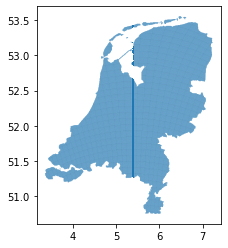

In [91]:
nl_map_cbs = gpd.read_file(r'../data/shape/Netherlands_shapefile/cbs_vk500_2021_v1.gpkg')
nl_map_cbs.to_crs(epsg=4326).plot()

Het verwerken van de 100m bij 100m vierkanten kaart duurde lang (langer dan een half uur) op de laptop, en is dus niet ideaal tenzij we dit niveau van detail écht nodig hebben. Er is namelijk nog een andere kaart met dezelfde gegevens beschikbaar, maar met een grid van 500 bij 500 meter in plaats van 100 bij 100. Laten we dus kijken hoe vaak een stemlokaal dichterbij dan 100 meter van de dichtstbijzijnde andere is. De makkelijkste manier om dat te doen zonder alle punten met alle andere te vergelijken (wat lang duurt), is een extra dataframe maken als een kopie, alle indexen 1 opschuiven (want alle stemlokalen zijn al in een volgorde van clustering), en dan de laagste afstand bekijken.

In [92]:
# Use Rijksdriehoekscoördinaten (EPSG:28992) as this uses meters as unit so we can calculate the distance in meters
df_shifted = df_geojson_clean.to_crs('EPSG:28992')

df_shifted['geometry (shifted)'] = df_shifted['geometry'].shift(periods=1)
df_shifted['distance'] = df_shifted['geometry'].distance(df_shifted['geometry (shifted)'])
df_shifted.sort_values(['distance'], inplace=True, ascending=True)
zero_mask_booth = df_shifted['distance'] == 0.000000
df_shifted = df_shifted[~zero_mask_booth]
print(df_shifted['distance'])

12595      0.000000
7470       0.000000
1263       0.000000
7578       0.000000
7580       0.000000
            ...    
2235     499.159730
6809     499.369706
4749     499.451620
7965     499.453972
0               NaN
Name: distance, Length: 2357, dtype: float64


Los van bovenstaande resultaten blijkt het dat de 100m kaart niet dezelfde inwonersgegevens heeft als de 500m kaart. Deze hebben we echter nodig voor de analyse, dus we gaan verder met de 500 bij 500 meter kaart. Laten we nu een projectie proberen te maken met de bevolkingsdichtheid erop om het te vergelijken met de stemlokalen en hun posities en clustering.

In [95]:
print(list(nl_map_cbs))
nl_map_dst = nl_map_cbs.drop(columns=['aantal_mannen', 'aantal_vrouwen', 'aantal_inwoners_0_tot_15_jaar', 'aantal_inwoners_15_tot_25_jaar', 'aantal_inwoners_25_tot_45_jaar', 'aantal_inwoners_45_tot_65_jaar', 'aantal_inwoners_65_jaar_en_ouder', 'percentage_nederlandse_achtergrond', 'percentage_westerse_migr_achtergr', 'percentage_niet_westerse_migr_achtergr', 'aantal_personen_met_uitkering_onder_aowlft', 'aantal_part_huishoudens', 'aantal_eenpersoonshuishoudens', 'aantal_meerpersoonshuishoudens_zonder_kind', 'aantal_eenouderhuishoudens', 'aantal_tweeouderhuishoudens', 'gemiddelde_huishoudensgrootte', 'aantal_woningen', 'aantal_woningen_bouwjaar_voor_1945', 'aantal_woningen_bouwjaar_45_tot_65', 'aantal_woningen_bouwjaar_65_tot_75', 'aantal_woningen_bouwjaar_75_tot_85', 'aantal_woningen_bouwjaar_85_tot_95', 'aantal_woningen_bouwjaar_95_tot_05', 'aantal_woningen_bouwjaar_05_tot_15', 'aantal_woningen_bouwjaar_15_en_later', 'aantal_meergezins_woningen', 'percentage_koopwoningen', 'percentage_huurwoningen', 'aantal_huurwoningen_in_bezit_woningcorporaties', 'aantal_niet_bewoonde_woningen', 'gemiddelde_woz_waarde_woning', 'omgevingsadressendichtheid'])

nl_map_dst

['crs28992res500m', 'aantal_inwoners', 'aantal_mannen', 'aantal_vrouwen', 'aantal_inwoners_0_tot_15_jaar', 'aantal_inwoners_15_tot_25_jaar', 'aantal_inwoners_25_tot_45_jaar', 'aantal_inwoners_45_tot_65_jaar', 'aantal_inwoners_65_jaar_en_ouder', 'percentage_nederlandse_achtergrond', 'percentage_westerse_migr_achtergr', 'percentage_niet_westerse_migr_achtergr', 'aantal_personen_met_uitkering_onder_aowlft', 'aantal_part_huishoudens', 'aantal_eenpersoonshuishoudens', 'aantal_meerpersoonshuishoudens_zonder_kind', 'aantal_eenouderhuishoudens', 'aantal_tweeouderhuishoudens', 'gemiddelde_huishoudensgrootte', 'aantal_woningen', 'aantal_woningen_bouwjaar_voor_1945', 'aantal_woningen_bouwjaar_45_tot_65', 'aantal_woningen_bouwjaar_65_tot_75', 'aantal_woningen_bouwjaar_75_tot_85', 'aantal_woningen_bouwjaar_85_tot_95', 'aantal_woningen_bouwjaar_95_tot_05', 'aantal_woningen_bouwjaar_05_tot_15', 'aantal_woningen_bouwjaar_15_en_later', 'aantal_meergezins_woningen', 'percentage_koopwoningen', 'percentag

crs28992res500m  aantal_inwoners  stedelijkheid  \
0           E2260N6190           -99997         -99997   
1           E2265N6190           -99997         -99997   
2           E2270N6190           -99997         -99997   
3           E2275N6190           -99997         -99997   
4           E2280N6190           -99997         -99997   
...                ...              ...            ...   
151103      E1995N3070           -99997              5   
151104      E1905N3065           -99997         -99997   
151105      E1910N3065           -99997         -99997   
151106      E1920N3065               15              5   
151107      E1925N3065           -99997              5   

                                                 geometry  
0       MULTIPOLYGON (((226000.000 619000.000, 226000....  
1       MULTIPOLYGON (((226500.000 619500.000, 227000....  
2       MULTIPOLYGON (((227000.000 619500.000, 227500....  
3       MULTIPOLYGON (((227500.000 619500.000, 228000....  
4       MULTIPOLYGON (((228000.000 619500.000, 228500....  
...                                                   ...  
151103  MULTIPOLYGON (((199500.000 307500.000, 200000....  
151104  MULTIPOLYGON (((190500.000 307000.000, 191000....  
151105  MULTIPOLYGON (((191000.000 307000.000, 191500....  
151106  MULTIPOLYGON (((192000.000 307000.000, 192500....  
151107  MULTIPOLYGON (((192500.000 307000.000, 193000....  

[151108 rows x 4 columns]

We kunnen zien dat er gemeente zijn die geen stemlokalen hebben, dit klopt. [In de verkiezingen van 2022 hebben 12 gemeentes niet meegedaan](https://nl.wikipedia.org/wiki/Nederlandse_gemeenteraadsverkiezingen_2022). Er zijn dus in totaal 333 gemeentes met stemlokalen. We willen de bevolkingsdichtheiddata van de gemeentes die niet meededen dus weggooien, hiervoor moeten we eerst kijken welke alleen binnen de gemeentes vallen die we niet willen houden.

In [96]:
print(df_geojson['electionName'])

#get all municipalities that are in the election
gemeentes = df_geojson['electionName'].str.slice(13, -5).drop_duplicates()
print(gemeentes)

0             Gemeenteraad Aa en Hunze 2022
1             Gemeenteraad Aa en Hunze 2022
2             Gemeenteraad Aa en Hunze 2022
3             Gemeenteraad Aa en Hunze 2022
4             Gemeenteraad Aa en Hunze 2022
                        ...                
12591    Gemeenteraad 's-Hertogenbosch 2022
12592    Gemeenteraad 's-Hertogenbosch 2022
12593    Gemeenteraad 's-Hertogenbosch 2022
12594    Gemeenteraad 's-Hertogenbosch 2022
12595    Gemeenteraad 's-Hertogenbosch 2022
Name: electionName, Length: 12596, dtype: object
0             Aa en Hunze
27               Aalsmeer
46                 Aalten
74          Achtkarspelen
95           Alblasserdam
               ...       
11976     Zwartewaterland
11997         Zwijndrecht
12031              Zwolle
12122       's-Gravenhage
12495    's-Hertogenbosch
Name: electionName, Length: 333, dtype: object


In [97]:
#First let's remove the municipalities that don't have an Election from the municipality map
remove_lst = ["Boxtel", "Eemsdelta", "Oisterwijk", "Vught", "Heerhugowaard", "Langedijk", "Boxmeer", "Cuijk", "Sint Anthonis", "Mill en Sint Hubert", "Grave", "Landerd", "Uden", "Brielle", "Hellevoetsluis", "Westvoorne", "Purmerend", "Beemster", "Weesp"]


nl_map_clean = nl_map[~nl_map["GM_NAAM"].isin(remove_lst)]
nl_map_clean = nl_map_clean.query("H2O != 'JA'")
nl_map_clean = nl_map_clean.query("GM_NAAM != 'Buitenland'")


nl_map_election = nl_map[nl_map["GM_NAAM"].isin(gemeentes)]
nl_map_election = nl_map_election.query("H2O != 'JA'")

print("Shape of clean: {}".format(nl_map_clean.shape))
print("Shape of election: {}".format(nl_map_election.shape))

diff = pd.concat([nl_map_election, nl_map_clean]).drop_duplicates(keep=False)
diff

Shape of clean: (333, 38)
Shape of election: (330, 38)


GM_CODE       GM_NAAM  H2O   OAD  STED  BEV_DICHTH  AANT_INW  AANT_MAN  \
113  GM0164       Hengelo  NEE  1845     2        1332     81049     40776   
191  GM0373  Bergen (NH.)  NEE   819     4         300     29715     14317   
328  GM0893   Bergen (L.)  NEE   318     5         127     13108      6568   

     AANT_VROUW  P_00_14_JR  ...  P_TURKIJE  P_OVER_NW  OPP_TOT  OPP_LAND  \
113       40273          15  ...          6          7     6183      6084   
191       15398          12  ...          0          3    12023      9896   
328        6540          13  ...          0          3    10850     10324   

     OPP_WATER  JRSTATCODE  JAAR    Shape_Leng    Shape_Area  \
113         99  2021GM0164  2021  47510.255914  6.183056e+07   
191       2127  2021GM0373  2021  57488.474563  9.987418e+07   
328        525  2021GM0893  2021  61497.563571  1.084951e+08   

                                              geometry  
113  POLYGON ((251978.591 481220.258, 251979.382 48...  
191  POLYGON ((105976.650 529056.951, 106002.347 52...  
328  POLYGON ((199768.270 409749.960, 199758.060 40...  

[3 rows x 38 columns]

Het is een andere vorm omdat deze drie gemeentes een andere format hadden voor de naam van hun verkiezingen, en dus niet op dezelfde manier gefilterd konden worden, ze staan wel in de lijst, dit is dus correct, we gebruiken de clean dataframe.
Nu we dezelfde lijst hebben van gemeentes die in de verkiezingen meededen kunnen we verder.

<AxesSubplot:>

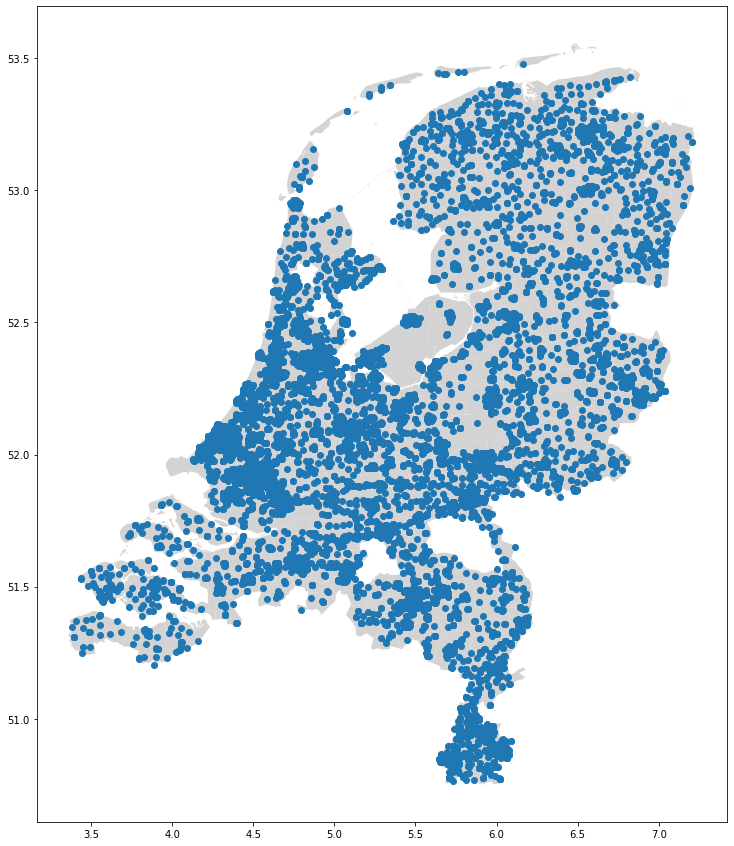

In [98]:
fig, ax = plt.subplots(figsize = (15,15))
nl_map_clean.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
df_geojson_clean.plot(ax=ax)

<AxesSubplot:>

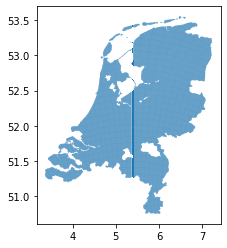

In [99]:
nl_map_dst['savedindex'] = nl_map_dst.index #Save the index values as a new column

intersecting = nl_map_clean.sjoin(nl_map_dst, how='inner')['savedindex'] #Find the polygons that intersect. Keep savedindex as a series

nl_map_dst = nl_map_dst.loc[nl_map_dst.savedindex.isin(intersecting)] #Filter away these, "savedindex is in intersecting"

nl_map_dst.to_crs(epsg=4326).plot()



In [102]:
import folium
from folium import plugins

#Location is Amersfoort, the central point of the continental Netherlands
map = folium.Map(location = [52.155, 5.3875], zoom_start = 9, tiles="cartodbdark_matter", prefer_canvas=True)

nl_map_dst.to_crs(epsg=4326)
#Make sure the index is a string so folium can read it correctly as a key.
nl_map_dst['crs28992res500m'] = nl_map_dst['crs28992res500m'].apply(lambda x: str(x))

nl_map_dst_zero = nl_map_dst.copy()

zero_mask_pop = nl_map_dst['aantal_inwoners'] == -99997
nl_map_dst = nl_map_dst[~zero_mask_pop]
zero_mask_pop2 = nl_map_dst['aantal_inwoners'] == 0
nl_map_dst = nl_map_dst[~zero_mask_pop2]

folium.Choropleth(
    geo_data = nl_map_dst,
    name="Bevolkingsdichtheid",
    data = nl_map_dst,
    columns = ["crs28992res500m", "aantal_inwoners"],
    key_on = 'feature.properties.crs28992res500m',
    fill_color = 'RdPu',
    nan_fill_color= 'white',
    fill_opacity = 0.7,
    nan_fill_opacity = 0.7,
    line_opacity = 0,
    legend_name = 'Bevolkingsdichtheid',
    smooth_factor = 1.0,
    show=False
).add_to(map)
map

# Renders the map to an HTML file and displays it in an embed.
def embed_map(m):
    #from IPython.display import IFrame
    m.save('index.html')
    #return IFrame('index.html', width='100%', height='750px')

/home/lillian/.conda/envs/stembureaus/lib/python3.10/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [103]:
gdf_wims_hmp = [[point.xy[1][0], point.xy[0][0]] for point in gdf_wims.geometry]

plugins.HeatMap(gdf_wims_hmp, name="Stemlokalen Heatmap").add_to(map)

folium.LayerControl().add_to(map)



embed_map(map)




In [104]:
nl_map_dst_points = nl_map_dst.copy()
nl_map_dst_points['geometry'] = nl_map_dst_points['geometry'].centroid

nl_map_dst_zero_points = nl_map_dst_zero.copy()
nl_map_dst_zero_points['geometry'] = nl_map_dst_zero_points['geometry'].centroid

nl_map_dst_zero_points

crs28992res500m  aantal_inwoners  stedelijkheid  \
2           E2270N6190           -99997         -99997   
3           E2275N6190           -99997         -99997   
4           E2280N6190           -99997         -99997   
7           E2265N6185           -99997         -99997   
8           E2270N6185           -99997         -99997   
...                ...              ...            ...   
151102      E1990N3070           -99997         -99997   
151103      E1995N3070           -99997              5   
151105      E1910N3065           -99997         -99997   
151106      E1920N3065               15              5   
151107      E1925N3065           -99997              5   

                             geometry  savedindex  
2       POINT (227250.000 619250.000)           2  
3       POINT (227750.000 619250.000)           3  
4       POINT (228250.000 619250.000)           4  
7       POINT (226750.000 618750.000)           7  
8       POINT (227250.000 618750.000)           8  
...                               ...         ...  
151102  POINT (199250.000 307250.000)      151102  
151103  POINT (199750.000 307250.000)      151103  
151105  POINT (191250.000 306750.000)      151105  
151106  POINT (192250.000 306750.000)      151106  
151107  POINT (192750.000 306750.000)      151107  

[140002 rows x 5 columns]

In [105]:
import numpy as np

from scipy.spatial import cKDTree
from shapely.geometry import Point
#Found on https://gis.stackexchange.com/questions/222315/finding-nearest-point-in-other-geodataframe-using-geopandas
def ckdnearest(gdA, gdB):

    nA = np.array(list(gdA.geometry.apply(lambda x: (x.x, x.y))))
    nB = np.array(list(gdB.geometry.apply(lambda x: (x.x, x.y))))
    btree = cKDTree(nB)
    dist, idx = btree.query(nA, k=1)
    gdB_nearest = gdB.iloc[idx].drop(columns="geometry").reset_index(drop=True)
    gdf = pd.concat(
        [
            gdA.reset_index(drop=True),
            gdB_nearest,
            pd.Series(dist, name='dist')
        ], 
        axis=1)

    return gdf

#error bar is +- sqrt(250²*2)m ≈ +-353.553390593m
error = np.sqrt(250**2 + 250**2)
df_nearest = ckdnearest(nl_map_dst_points.to_crs(epsg=28992), gdf_wims_dedupe.to_crs(epsg=28992))
df_nearest.head()



crs28992res500m  aantal_inwoners  stedelijkheid  \
0      E2050N6110                5              5   
1      E2060N6110               10              5   
2      E2055N6105               20              5   
3      E2060N6105              185              5   
4      E2065N6105              335              5   

                        geometry  savedindex    _id         Gemeente  \
0  POINT (205250.000 611250.000)         267  30871  Schiermonnikoog   
1  POINT (206250.000 611250.000)         269  30871  Schiermonnikoog   
2  POINT (205750.000 610750.000)         292  30871  Schiermonnikoog   
3  POINT (206250.000 610750.000)         293  30871  Schiermonnikoog   
4  POINT (206750.000 610750.000)         294  30871  Schiermonnikoog   

  CBS gemeentecode  Nummer stembureau          Naam stembureau  ...  \
0           GM0088                  1  Gemeentehuis (Raadzaal)  ...   
1           GM0088                  1  Gemeentehuis (Raadzaal)  ...   
2           GM0088                  1  Gemeentehuis (Raadzaal)  ...   
3           GM0088                  1  Gemeentehuis (Raadzaal)  ...   
4           GM0088                  1  Gemeentehuis (Raadzaal)  ...   

   Hoofdstembureau Tellocatie                   Contactgegevens gemeente  \
0  Schiermonnikoog        NaN  postbus20@schiermonnikoog.nl, 0519-535050   
1  Schiermonnikoog        NaN  postbus20@schiermonnikoog.nl, 0519-535050   
2  Schiermonnikoog        NaN  postbus20@schiermonnikoog.nl, 0519-535050   
3  Schiermonnikoog        NaN  postbus20@schiermonnikoog.nl, 0519-535050   
4  Schiermonnikoog        NaN  postbus20@schiermonnikoog.nl, 0519-535050   

                         Verkiezingswebsite gemeente  Verkiezingen  \
0  https://www.schiermonnikoog.nl/in-de-gemeente/...           NaN   
1  https://www.schiermonnikoog.nl/in-de-gemeente/...           NaN   
2  https://www.schiermonnikoog.nl/in-de-gemeente/...           NaN   
3  https://www.schiermonnikoog.nl/in-de-gemeente/...           NaN   
4  https://www.schiermonnikoog.nl/in-de-gemeente/...           NaN   

                                  ID                              UUID  \
0  NLODSGM0088stembureaus20220316009  35abba36eca7485c89e82b2917633ae7   
1  NLODSGM0088stembureaus20220316009  35abba36eca7485c89e82b2917633ae7   
2  NLODSGM0088stembureaus20220316009  35abba36eca7485c89e82b2917633ae7   
3  NLODSGM0088stembureaus20220316009  35abba36eca7485c89e82b2917633ae7   
4  NLODSGM0088stembureaus20220316009  35abba36eca7485c89e82b2917633ae7   

  Unnamed: 39 Unnamed: 40         dist  
0         NaN         NaN  1331.950309  
1         NaN         NaN   688.536284  
2         NaN         NaN   672.375861  
3         NaN         NaN   228.220493  
4         NaN         NaN   389.974214  

[5 rows x 47 columns]

Het was mooier geweest als we het konden filteren op alleen stemgerechtigden en niet op de gehele populatiedichtheid, maar het CBS geeft geen data vrij die daarbij helpt. Er is een categorie voor 0-14 jaar oude mensen, maar niet alle minderjarigen of niet stemgerechtigde. Het moet dus maar met totale bevolkingsdichtheid om een idee te krijgen.

In [108]:
nl_map_dst_zero_points["aantal_inwoners"].mask(nl_map_dst_zero_points["aantal_inwoners"] == -99997, 0, inplace=True)
nl_map_dst_zero_points.head()
df_nearest_zero = ckdnearest(nl_map_dst_zero_points.to_crs(epsg=28992), gdf_wims_dedupe.to_crs(epsg=28992))
df_nearest_zero["aantal_inwoners"].dropna()
df_nearest_zero["dist"].dropna()
df_nearest_zero

crs28992res500m  aantal_inwoners  stedelijkheid  \
0           E2270N6190                0         -99997   
1           E2275N6190                0         -99997   
2           E2280N6190                0         -99997   
3           E2265N6185                0         -99997   
4           E2270N6185                0         -99997   
...                ...              ...            ...   
139997      E1990N3070                0         -99997   
139998      E1995N3070                0              5   
139999      E1910N3065                0         -99997   
140000      E1920N3065               15              5   
140001      E1925N3065                0              5   

                             geometry  savedindex    _id       Gemeente  \
0       POINT (227250.000 619250.000)           2  31030   Het Hogeland   
1       POINT (227750.000 619250.000)           3  31030   Het Hogeland   
2       POINT (228250.000 619250.000)           4  31030   Het Hogeland   
3       POINT (226750.000 618750.000)           7  31030   Het Hogeland   
4       POINT (227250.000 618750.000)           8  31030   Het Hogeland   
...                               ...         ...    ...            ...   
139997  POINT (199250.000 307250.000)      151102   4103          Vaals   
139998  POINT (199750.000 307250.000)      151103   4103          Vaals   
139999  POINT (191250.000 306750.000)      151105  29739  Gulpen-Wittem   
140000  POINT (192250.000 306750.000)      151106  29739  Gulpen-Wittem   
140001  POINT (192750.000 306750.000)      151107  29739  Gulpen-Wittem   

       CBS gemeentecode  Nummer stembureau             Naam stembureau  ...  \
0                GM1966                  1       Dorpshuis Pieterburen  ...   
1                GM1966                  1       Dorpshuis Pieterburen  ...   
2                GM1966                  1       Dorpshuis Pieterburen  ...   
3                GM1966                  1       Dorpshuis Pieterburen  ...   
4                GM1966                  1       Dorpshuis Pieterburen  ...   
...                 ...                ...                         ...  ...   
139997           GM0981                  3                   Auw Sjoel  ...   
139998           GM0981                  3                   Auw Sjoel  ...   
139999           GM1729                  7  Gemeenschapshuis Patronaat  ...   
140000           GM1729                  7  Gemeenschapshuis Patronaat  ...   
140001           GM1729                  7  Gemeenschapshuis Patronaat  ...   

       Hoofdstembureau Tellocatie  \
0         Het Hogeland        NaN   
1         Het Hogeland        NaN   
2         Het Hogeland        NaN   
3         Het Hogeland        NaN   
4         Het Hogeland        NaN   
...                ...        ...   
139997           Vaals        NaN   
139998           Vaals        NaN   
139999   Gulpen-Wittem        NaN   
140000   Gulpen-Wittem        NaN   
140001   Gulpen-Wittem        NaN   

                            Contactgegevens gemeente  \
0                        verkiezingen@hethogeland.nl   
1                        verkiezingen@hethogeland.nl   
2                        verkiezingen@hethogeland.nl   
3                        verkiezingen@hethogeland.nl   
4                        verkiezingen@hethogeland.nl   
...                                              ...   
139997  Team verkiezingen, verkiezingen2022@vaals.nl   
139998  Team verkiezingen, verkiezingen2022@vaals.nl   
139999                  info@gulpen-wittem.nl 14 043   
140000                  info@gulpen-wittem.nl 14 043   
140001                  info@gulpen-wittem.nl 14 043   

                              Verkiezingswebsite gemeente  Verkiezingen  \
0       https://hethogeland.nl/bestuur-en-organisatie/...           NaN   
1       https://hethogeland.nl/bestuur-en-organisatie/...           NaN   
2       https://hethogeland.nl/bestuur-en-organisatie/...           NaN   
3       https://hethogeland.nl/bestuur-en-

In [109]:
df_nearest.sort_values(by=['dist'], inplace=True)
df_nearest[['Gemeente', 'Naam stembureau', 'dist']]

Gemeente                              Naam stembureau         dist
47304  Ridderkerk                                 Gemeentehuis     3.835321
32815       Baarn                            Dorpshuis de Furs     4.000517
5168    Groningen                       Dorpshuis De Hoeksteen     5.577246
38975   Montfoort                      Zalencentrum St. Joseph     5.703409
67518    Kerkrade                                  ’t Westhoes     7.252446
...           ...                                          ...          ...
23422    Zeewolde                                Het Kruispunt  8207.619943
22478    Lelystad                              Gymzaal De Borg  8402.730770
22348    Lelystad  Voormalige Scholengemeenschap De Rietlanden  8540.805874
22477    Lelystad  Voormalige Scholengemeenschap De Rietlanden  9028.790070
22619    Zeewolde                                   Panta Rhei  9173.600947

[68131 rows x 3 columns]

In [142]:
def plot_dist(df, label):
    plt.figure(figsize=(13,13))
    df['dist'].plot(kind="hist", weights=df['aantal_inwoners'], figsize=(13,13), density=False,title="Afstand tot Stemlokaal per 500 x 500 m vierkant (minimaal 5 mensen in het vierkant) Staffel {}".format(label), log=True).set_ylabel('Bevolking (Millioenen)')
    plt.figure(figsize=(13,13))
    df.plot.scatter(x = 'aantal_inwoners', y = 'dist', figsize=(13,13), title="Afstand tot Stemlokaal per 500 x 500 m vierkant (minimaal 5 mensen in het vierkant) Staffel {}".format(label), xlabel="Inwoners per 500m² (laagste is 5)", ylabel="Afstand tot stemlokaal (meter)")
    

<AxesSubplot:xlabel='Inwoners per 500m² (inclusief lege (<5 inwoners) vierkanten)', ylabel='Afstand tot stemlokaal (meter)'>

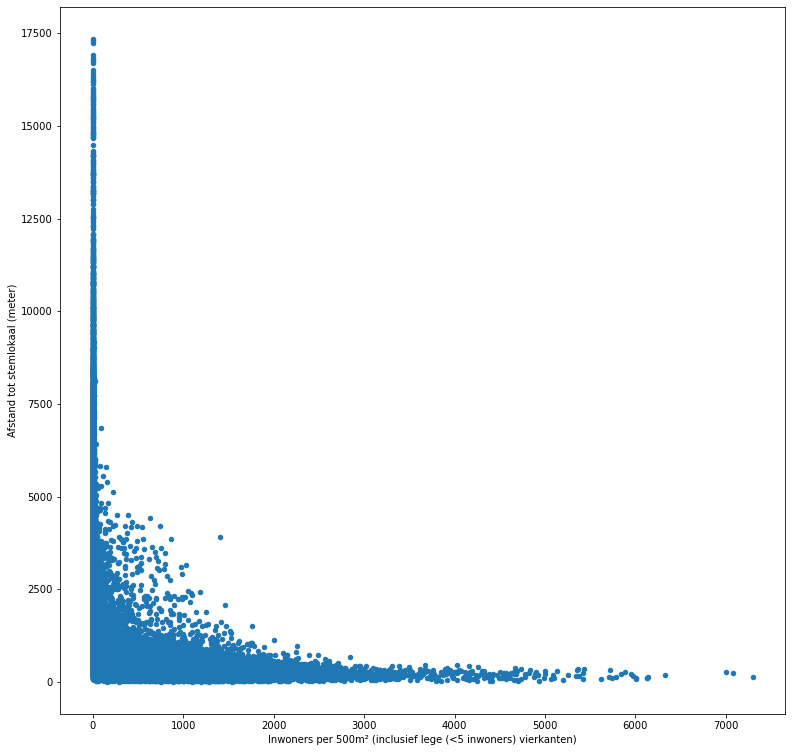

In [111]:
df_nearest_zero.plot.scatter(x = 'aantal_inwoners', y = 'dist', figsize=(13,13), xlabel="Inwoners per 500m² (inclusief lege (<5 inwoners) vierkanten)", ylabel="Afstand tot stemlokaal (meter)")

In [112]:
FIGSIZE = (13, 13)
def plot_bargraph_with_groupings(df, groupby, colourby, title, xlabel, ylabel):

    import matplotlib.patches as mpatches


    # Makes the bargraph.
    ax = df[groupby].value_counts().plot(kind='bar',
                                         figsize=FIGSIZE,
                                         title=title)
    

    # display the graph.
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

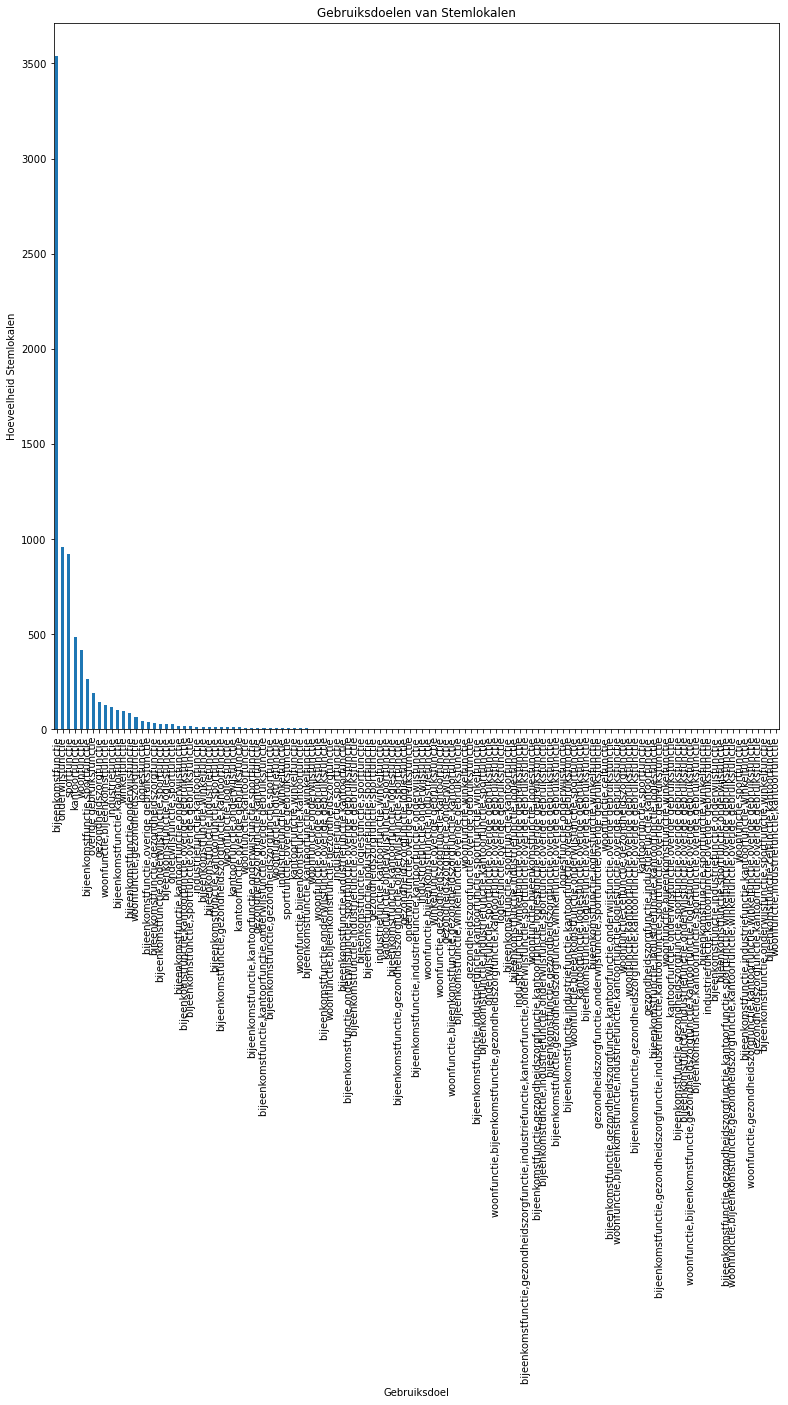

In [113]:
plot_bargraph_with_groupings(gdf_wims_dedupe, 'Gebruiksdoel van het gebouw', 'Gemeente', 'Gebruiksdoelen van Stemlokalen', 'Gebruiksdoel', 'Hoeveelheid Stemlokalen')

Dit is onbruikbaar, de categorieën moeten elk één balkje zijn, niet zoals dit.

In [130]:
def plot_use (df, label):
    plt.figure(figsize=(13,13))
    df_exploded = df.drop('Gebruiksdoel van het gebouw', axis=1).join(df['Gebruiksdoel van het gebouw'].str.split(',', expand=True).stack().reset_index(level=1,drop=True).rename('Gebruiksdoel van het gebouw'))
    #print(df_exploded)
    plot_bargraph_with_groupings(df_exploded, 'Gebruiksdoel van het gebouw', 'Gemeente', 'Gebruiksdoelen van Stemlokalen Staffel {}'.format(label), 'Gebruiksdoel', 'Hoeveelheid Stemlokalen')
    

In [115]:

wims_count = gdf_wims_dedupe['Gemeente'].value_counts()


geojson_rename = df_geojson_dedupe.rename(columns = {'electionName': 'Gemeente'})
geojson_count = geojson_rename['Gemeente'].str.slice(13, -5).value_counts()

pd.concat([geojson_count, wims_count]).drop_duplicates(keep=False)


Amsterdam              456
Rotterdam              398
's-Gravenhage          271
Utrecht                162
Breda                   90
Eindhoven               86
Groningen               85
Apeldoorn               71
Enschede                69
Alphen aan den Rijn     66
Leiden                  52
Deventer                51
West Betuwe             37
Waadhoeke               33
Amsterdam              382
Rotterdam              375
's-Gravenhage          258
Utrecht                161
Groningen              122
Breda                   89
Haarlemmermeer          79
Nijmegen                74
's-Hertogenbosch        40
Het Hogeland            39
Zoetermeer              38
Staphorst                2
Name: Gemeente, dtype: int64

In [116]:
gdf_wims_times = gdf_wims_dedupe.loc[:, ('Openingstijden 14-03-2022','Openingstijden 15-03-2022','Openingstijden 16-03-2022', 'UUID', 'Gemeente', 'CBS gemeentecode')]
gdf_wims_split = gdf_wims_times
gdf_wims_split[['Openingstijden 14-03-2022 van', 'Openingstijden 14-03-2022 tot']] = gdf_wims_times['Openingstijden 14-03-2022'].str.split(' tot ',1 , expand=True)
gdf_wims_split[['Openingstijden 15-03-2022 van', 'Openingstijden 15-03-2022 tot']] = gdf_wims_split['Openingstijden 15-03-2022'].str.split(' tot ',1 , expand=True)
gdf_wims_split[['Openingstijden 16-03-2022 van', 'Openingstijden 16-03-2022 tot']] = gdf_wims_split['Openingstijden 16-03-2022'].str.split(' tot ',1 , expand=True)

gdf_wims_split

Openingstijden 14-03-2022  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4     2022-03-14T07:30:00 tot 2022-03-14T21:00:00   
...                                           ...   
9270                                          NaN   
9271  2022-03-14T07:30:00 tot 2022-03-14T21:00:00   
9272                                          NaN   
9273                                          NaN   
9274                                          NaN   

                        Openingstijden 15-03-2022  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4     2022-03-15T07:30:00 tot 2022-03-15T21:00:00   
...                                           ...   
9270                                          NaN   
9271  2022-03-15T07:30:00 tot 2022-03-15T21:00:00   
9272  2022-03-15T07:30:00 tot 2022-03-15T21:00:00   
9273                                          NaN   
9274                                          NaN   

                        Openingstijden 16-03-2022  \
0     2022-03-16T10:00:00 tot 2022-03-16T13:00:00   
1     2022-03-16T07:30:00 tot 2022-03-16T21:00:00   
2     2022-03-16T07:30:00 tot 2022-03-16T21:00:00   
3     2022-03-16T07:30:00 tot 2022-03-16T21:00:00   
4     2022-03-16T07:30:00 tot 2022-03-16T21:00:00   
...                                           ...   
9270  2022-03-16T07:30:00 tot 2022-03-16T21:00:00   
9271  2022-03-16T07:30:00 tot 2022-03-16T21:00:00   
9272  2022-03-16T07:30:00 tot 2022-03-16T21:00:00   
9273  2022-03-16T07:30:00 tot 2022-03-16T21:00:00   
9274  2022-03-16T07:30:00 tot 2022-03-16T21:00:00   

                                  UUID      Gemeente CBS gemeentecode  \
0     3a612b2151fa4ab491b9e331355e6258  Valkenswaard           GM0858   
1     9a01d765af0a467ea37f08d92db114ba  Valkenswaard           GM0858   
2     fc5869d33fbc4b06be659149fa615f4c  Valkenswaard           GM0858   
3     4427cc0b39e040ba8f75c333f19d66f0  Valkenswaard           GM0858   
4     a893bb9add324ce29769f1c39afcc48d  Valkenswaard           GM0858   
...                                ...           ...              ...   
9270  f744546cd6894e5e9a4db4bbfd81b4ee        Gennep           GM0907   
9271  1270081b1dc74cd7bea0f45973650408        Gennep           GM0907   
9272  447c7742604345139e41def4cf1e4d3c        Gennep           GM0907   
9273  049cfd258c174bc49abf17883396d083        Gennep           GM0907   
9274  1e8cbe96e72c4c6ba6303f47bec8cdb5        Gennep           GM0907   

     Openingstijden 14-03-2022 van Openingstijden 14-03-2022 tot  \
0                              NaN                           NaN   
1                              NaN                           NaN   
2                              NaN                           NaN   
3                              NaN                           NaN   
4              2022-03-14T07:30:00           2022-03-14T21:00:00   
...                            ...                           ...   
9270                           NaN                           NaN   
9271           2022-03-14T07:30:00           2022-03-14T21:00:00   
9272                           NaN                           NaN   
9273                           NaN                           NaN   
9274                           NaN                           NaN   

     Openingstijden 15-03-2022 van Openingstijden 15-03-2022 tot  \
0                              NaN                           NaN   
1                              NaN                           NaN   
2                              NaN                           NaN   
3                              NaN                           NaN   
4              2022-03-15T07:30:00           2022-03-15T21:00:00   
...        

In [117]:
gdf_wims_split[['Openingstijden 14-03-2022 van','Openingstijden 15-03-2022 van','Openingstijden 16-03-2022 van', 'Openingstijden 14-03-2022 tot', 'Openingstijden 15-03-2022 tot','Openingstijden 16-03-2022 tot']] = gdf_wims_split[['Openingstijden 14-03-2022 van','Openingstijden 15-03-2022 van','Openingstijden 16-03-2022 van','Openingstijden 14-03-2022 tot','Openingstijden 15-03-2022 tot','Openingstijden 16-03-2022 tot']].apply(pd.to_datetime, errors='coerce')
gdf_wims_split

Openingstijden 14-03-2022  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4     2022-03-14T07:30:00 tot 2022-03-14T21:00:00   
...                                           ...   
9270                                          NaN   
9271  2022-03-14T07:30:00 tot 2022-03-14T21:00:00   
9272                                          NaN   
9273                                          NaN   
9274                                          NaN   

                        Openingstijden 15-03-2022  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4     2022-03-15T07:30:00 tot 2022-03-15T21:00:00   
...                                           ...   
9270                                          NaN   
9271  2022-03-15T07:30:00 tot 2022-03-15T21:00:00   
9272  2022-03-15T07:30:00 tot 2022-03-15T21:00:00   
9273                                          NaN   
9274                                          NaN   

                        Openingstijden 16-03-2022  \
0     2022-03-16T10:00:00 tot 2022-03-16T13:00:00   
1     2022-03-16T07:30:00 tot 2022-03-16T21:00:00   
2     2022-03-16T07:30:00 tot 2022-03-16T21:00:00   
3     2022-03-16T07:30:00 tot 2022-03-16T21:00:00   
4     2022-03-16T07:30:00 tot 2022-03-16T21:00:00   
...                                           ...   
9270  2022-03-16T07:30:00 tot 2022-03-16T21:00:00   
9271  2022-03-16T07:30:00 tot 2022-03-16T21:00:00   
9272  2022-03-16T07:30:00 tot 2022-03-16T21:00:00   
9273  2022-03-16T07:30:00 tot 2022-03-16T21:00:00   
9274  2022-03-16T07:30:00 tot 2022-03-16T21:00:00   

                                  UUID      Gemeente CBS gemeentecode  \
0     3a612b2151fa4ab491b9e331355e6258  Valkenswaard           GM0858   
1     9a01d765af0a467ea37f08d92db114ba  Valkenswaard           GM0858   
2     fc5869d33fbc4b06be659149fa615f4c  Valkenswaard           GM0858   
3     4427cc0b39e040ba8f75c333f19d66f0  Valkenswaard           GM0858   
4     a893bb9add324ce29769f1c39afcc48d  Valkenswaard           GM0858   
...                                ...           ...              ...   
9270  f744546cd6894e5e9a4db4bbfd81b4ee        Gennep           GM0907   
9271  1270081b1dc74cd7bea0f45973650408        Gennep           GM0907   
9272  447c7742604345139e41def4cf1e4d3c        Gennep           GM0907   
9273  049cfd258c174bc49abf17883396d083        Gennep           GM0907   
9274  1e8cbe96e72c4c6ba6303f47bec8cdb5        Gennep           GM0907   

     Openingstijden 14-03-2022 van Openingstijden 14-03-2022 tot  \
0                              NaT                           NaT   
1                              NaT                           NaT   
2                              NaT                           NaT   
3                              NaT                           NaT   
4              2022-03-14 07:30:00           2022-03-14 21:00:00   
...                            ...                           ...   
9270                           NaT                           NaT   
9271           2022-03-14 07:30:00           2022-03-14 21:00:00   
9272                           NaT                           NaT   
9273                           NaT                           NaT   
9274                           NaT                           NaT   

     Openingstijden 15-03-2022 van Openingstijden 15-03-2022 tot  \
0                              NaT                           NaT   
1                              NaT                           NaT   
2                              NaT                           NaT   
3                              NaT                           NaT   
4              2022-03-15 07:30:00           2022-03-15 21:00:00   
...        

In [ ]:
import datetime as dt
wims_datemerge = pd.DataFrame()
def datesplit(df, column):
    df = df.dropna(subset = ['{} van'.format(column)])
    df1 = df.rename(columns={'{} van'.format(column):'vandate','{} tot'.format(column):'totdate', 'UUID':'UUID'})
    return  (pd.concat([pd.Series(r.UUID,pd.date_range(r.vandate, r.totdate, freq='0.5H')) 
                        for r in df1.itertuples()])
               .rename_axis('Openingstijden')
               .reset_index(name='UUID'))
def plot_opening(df, label):
    plt.figure(figsize=(13,13))
    wims_datesplit_14 = df.loc[:, ('Openingstijden 14-03-2022 van','Openingstijden 14-03-2022 tot', 'UUID')]
    wims_datesplit_15 = df.loc[:, ('Openingstijden 15-03-2022 van','Openingstijden 15-03-2022 tot', 'UUID')]
    wims_datesplit_16 = df.loc[:, ('Openingstijden 16-03-2022 van','Openingstijden 16-03-2022 tot', 'UUID')]
    wims_datesplit_14 = datesplit(wims_datesplit_14, 'Openingstijden 14-03-2022')
    wims_datesplit_15 = datesplit(wims_datesplit_15, 'Openingstijden 15-03-2022')
    wims_datesplit_16 = datesplit(wims_datesplit_16, 'Openingstijden 16-03-2022')

    wims_datesplit_14.reset_index()
    wims_datesplit_15.reset_index()
    wims_datesplit_16.reset_index()

    #wims_datesplit_14.info()
    #wims_datesplit_15.info()
    #wims_datesplit_16.info()

    
    wims_datestack = pd.concat([wims_datesplit_14, wims_datesplit_15], ignore_index=True)
    wims_datestack = pd.concat([wims_datestack, wims_datesplit_16], ignore_index=True)
    

    

    wims_datestack.set_index('Openingstijden', drop=False, inplace=True)

    #print(wims_datestack['Openingstijden'].unique())

    xticks = []
    xticklabels = []
    datetimecount = 0
    for datetime in wims_datestack.groupby(pd.Grouper(freq='30Min'))['Openingstijden'].unique():
        if (datetime.size > 0):
            xticks.append(datetime.ravel()[0])
            if(datetimecount % 6 == 0):
                ts = pd.to_datetime(datetime.ravel()[0])
                #hardcoded for the data, sloppy code, quick fix, only applies to timestamps with 7 minute changes to reality
                if (ts.minute == 7):
                    ts = ts - dt.timedelta(minutes=7)
                xticklabels.append(ts.strftime("%m-%d %H:%M"))
            else:
                xticklabels.append(" ")
        else:
            xticks.append("")
            xticklabels.append("")
        datetimecount += 1


    wims_datestack.groupby(pd.Grouper(freq='30Min')).count().plot(kind='bar', y='Openingstijden',width=1, figsize=(25, 25), title="Openingstijden stemlokalen staffel {} kiesgerechtigden".format(label)).set_xticklabels(xticklabels, rotation=-45, ha="left", rotation_mode="anchor")
    #TODO: export excel file

    #wims_datesplit_16.groupby(wims_datesplit_16["Openingstijden 16-03-2022"].dt.hour).count().plot(kind="bar", y='Openingstijden 16-03-2022')
    #wims_datesplit_16.groupby(pd.Grouper(freq='30Min')).count().plot(kind='bar', y='Openingstijden 16-03-2022')
    #wims_datesplit_15.groupby(wims_datesplit_15["Openingstijden 15-03-2022"].dt.hour).count().plot(kind="bar", y='Openingstijden 15-03-2022')
    #wims_datesplit_14.groupby(wims_datesplit_14["Openingstijden 14-03-2022"].dt.hour).count().plot(kind="bar", y='Openingstijden 14-03-2022')


In [122]:
df_stemger = pd.read_excel('../data/Maatwerk_kiesgerechtigd_per_gemeente_def.xlsx', sheet_name='Tabel 1', header=0, skiprows= [0,1,3,5,6,7,344,345])
df_stemger_clean = df_stemger[df_stemger['gemeentecode'].isin(nl_map_clean['GM_CODE'])]

bins = [0, 1, 3, 6, 10, 35, float("inf")]
labels = ['0-10.000', '10.000-30.000', '30.000-60.000', '60.000-100.000', '100.000-350.000', '350.000+']

df_stemger_clean['binned'] = pd.cut(df_stemger_clean['Kiesgerechtigde bevolking'], bins, labels=labels)


/tmp/ipykernel_112022/2535562662.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stemger_clean['binned'] = pd.cut(df_stemger_clean['Kiesgerechtigde bevolking'], bins, labels=labels)


<Figure size 936x936 with 0 Axes>

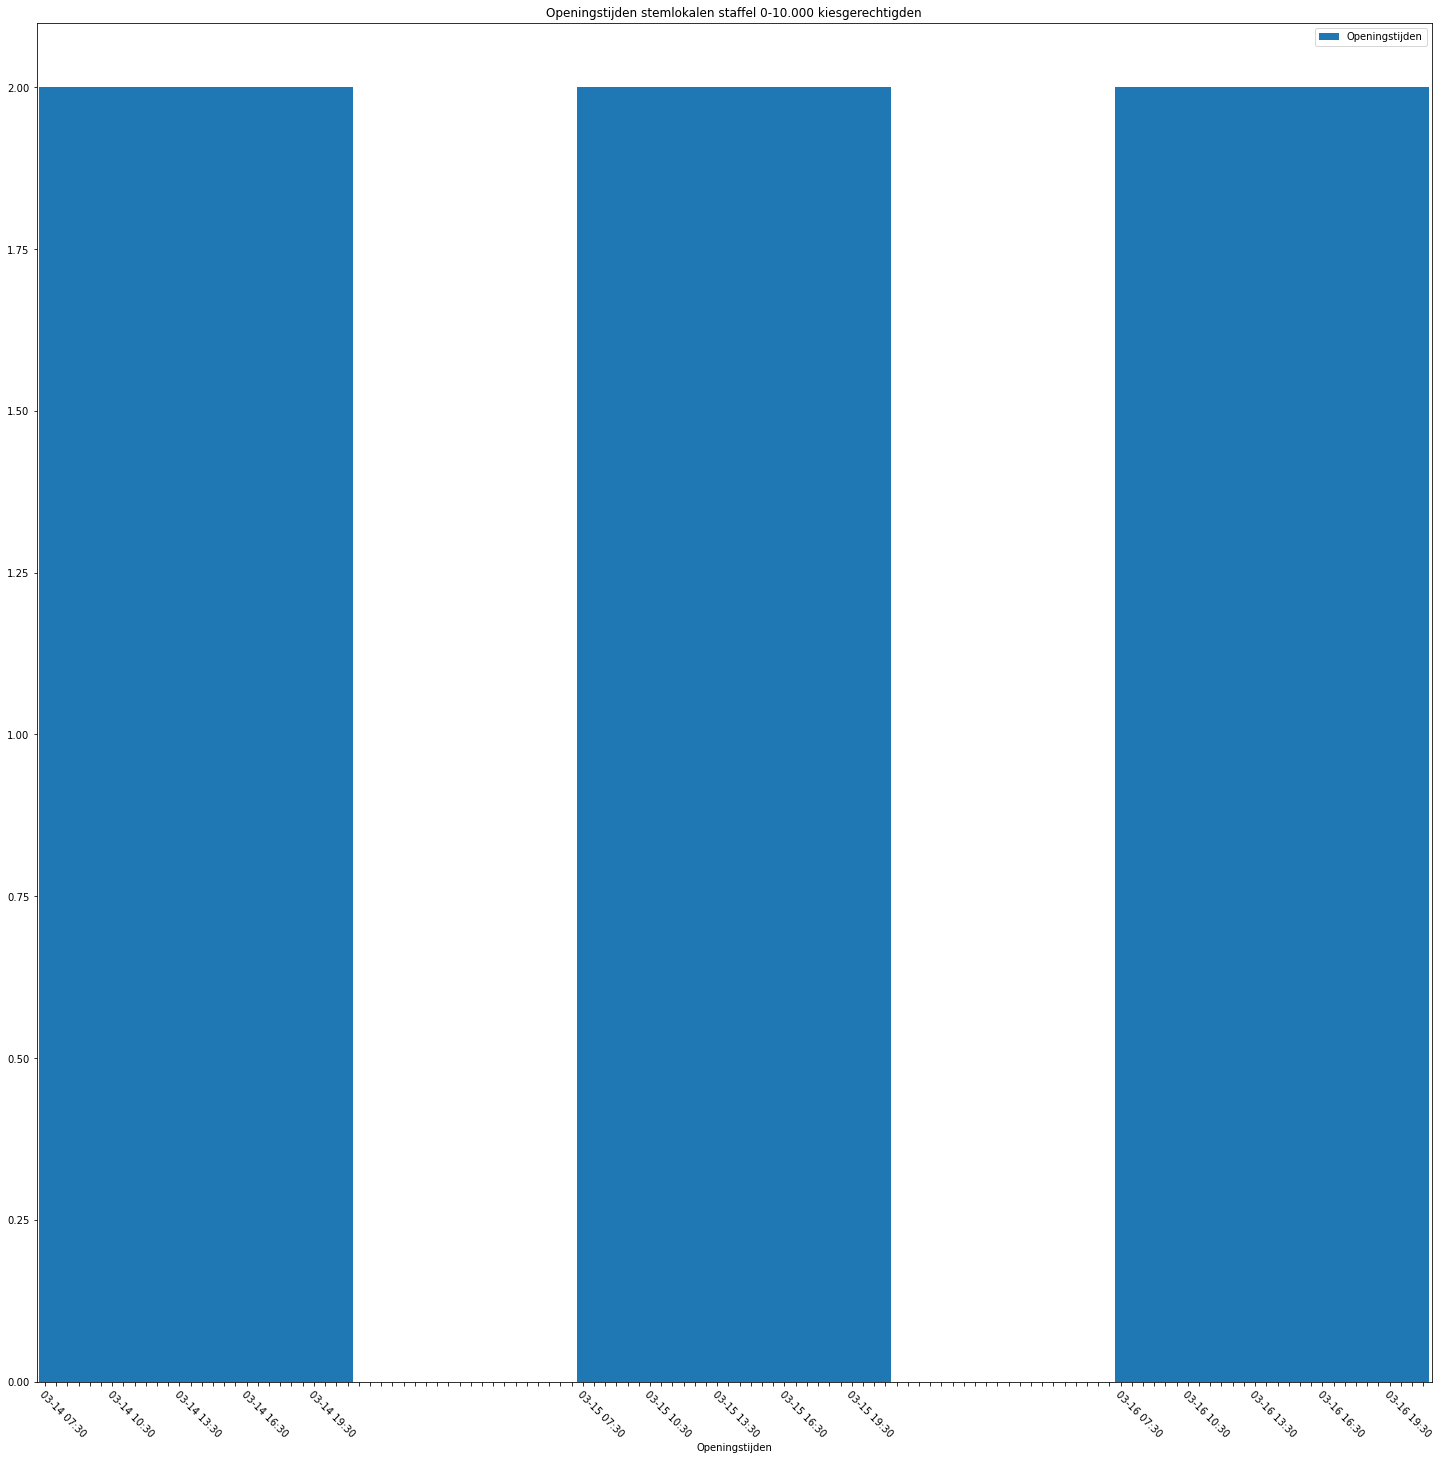

<Figure size 936x936 with 0 Axes>

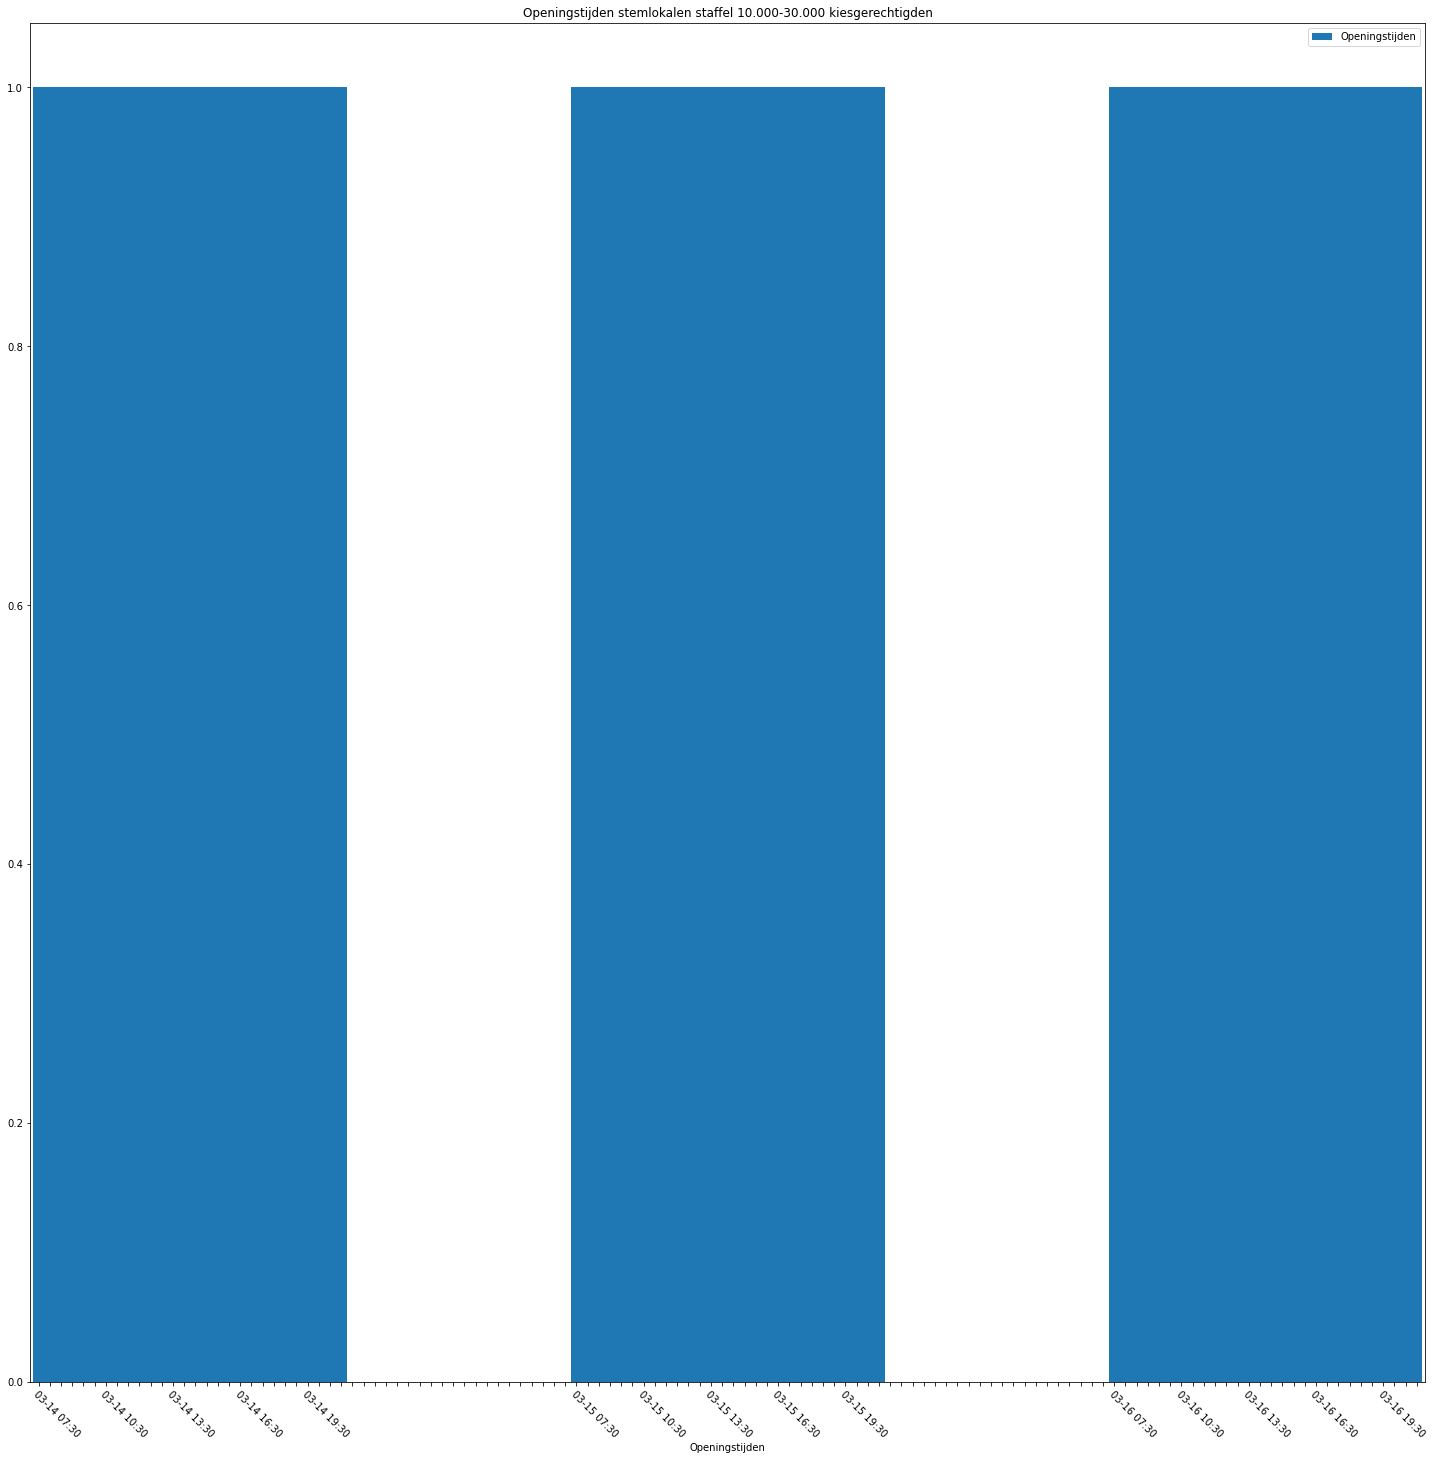

<Figure size 936x936 with 0 Axes>

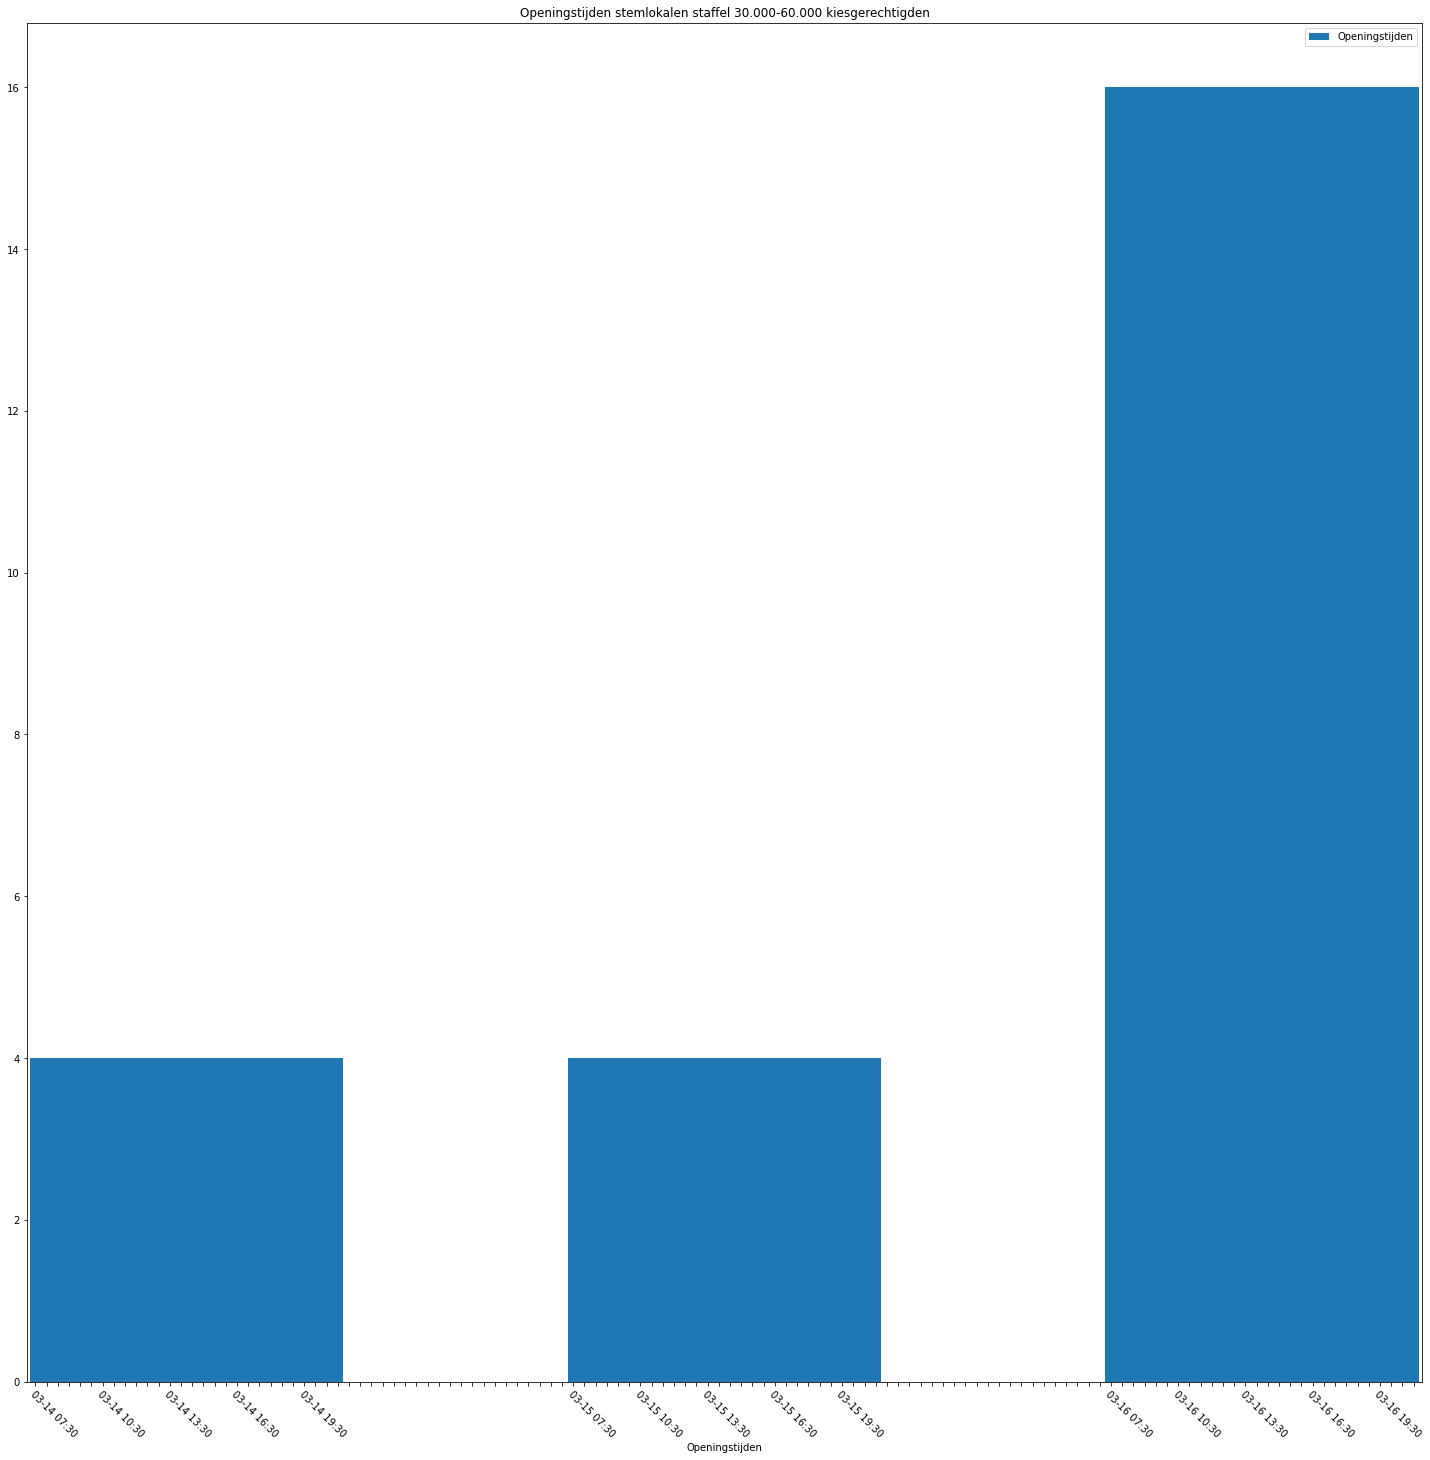

<Figure size 936x936 with 0 Axes>

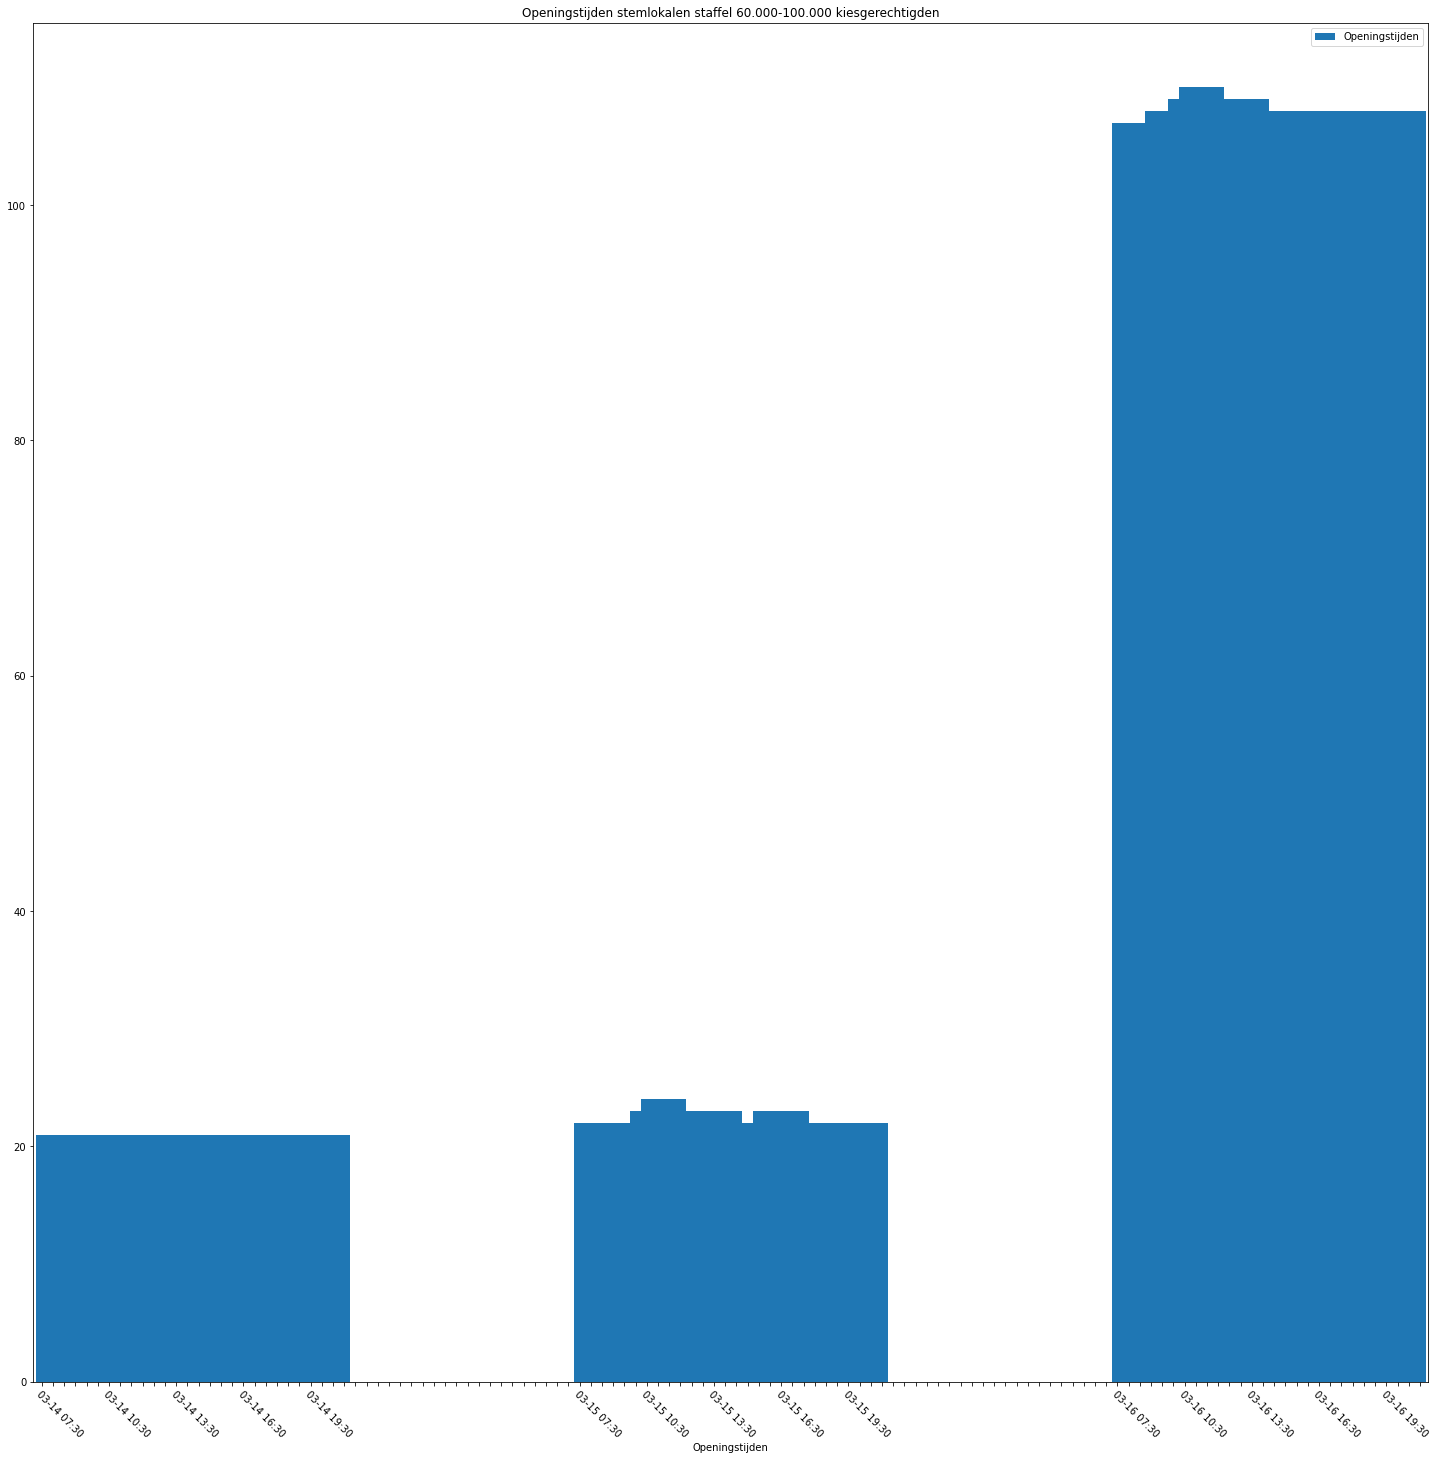

<Figure size 936x936 with 0 Axes>

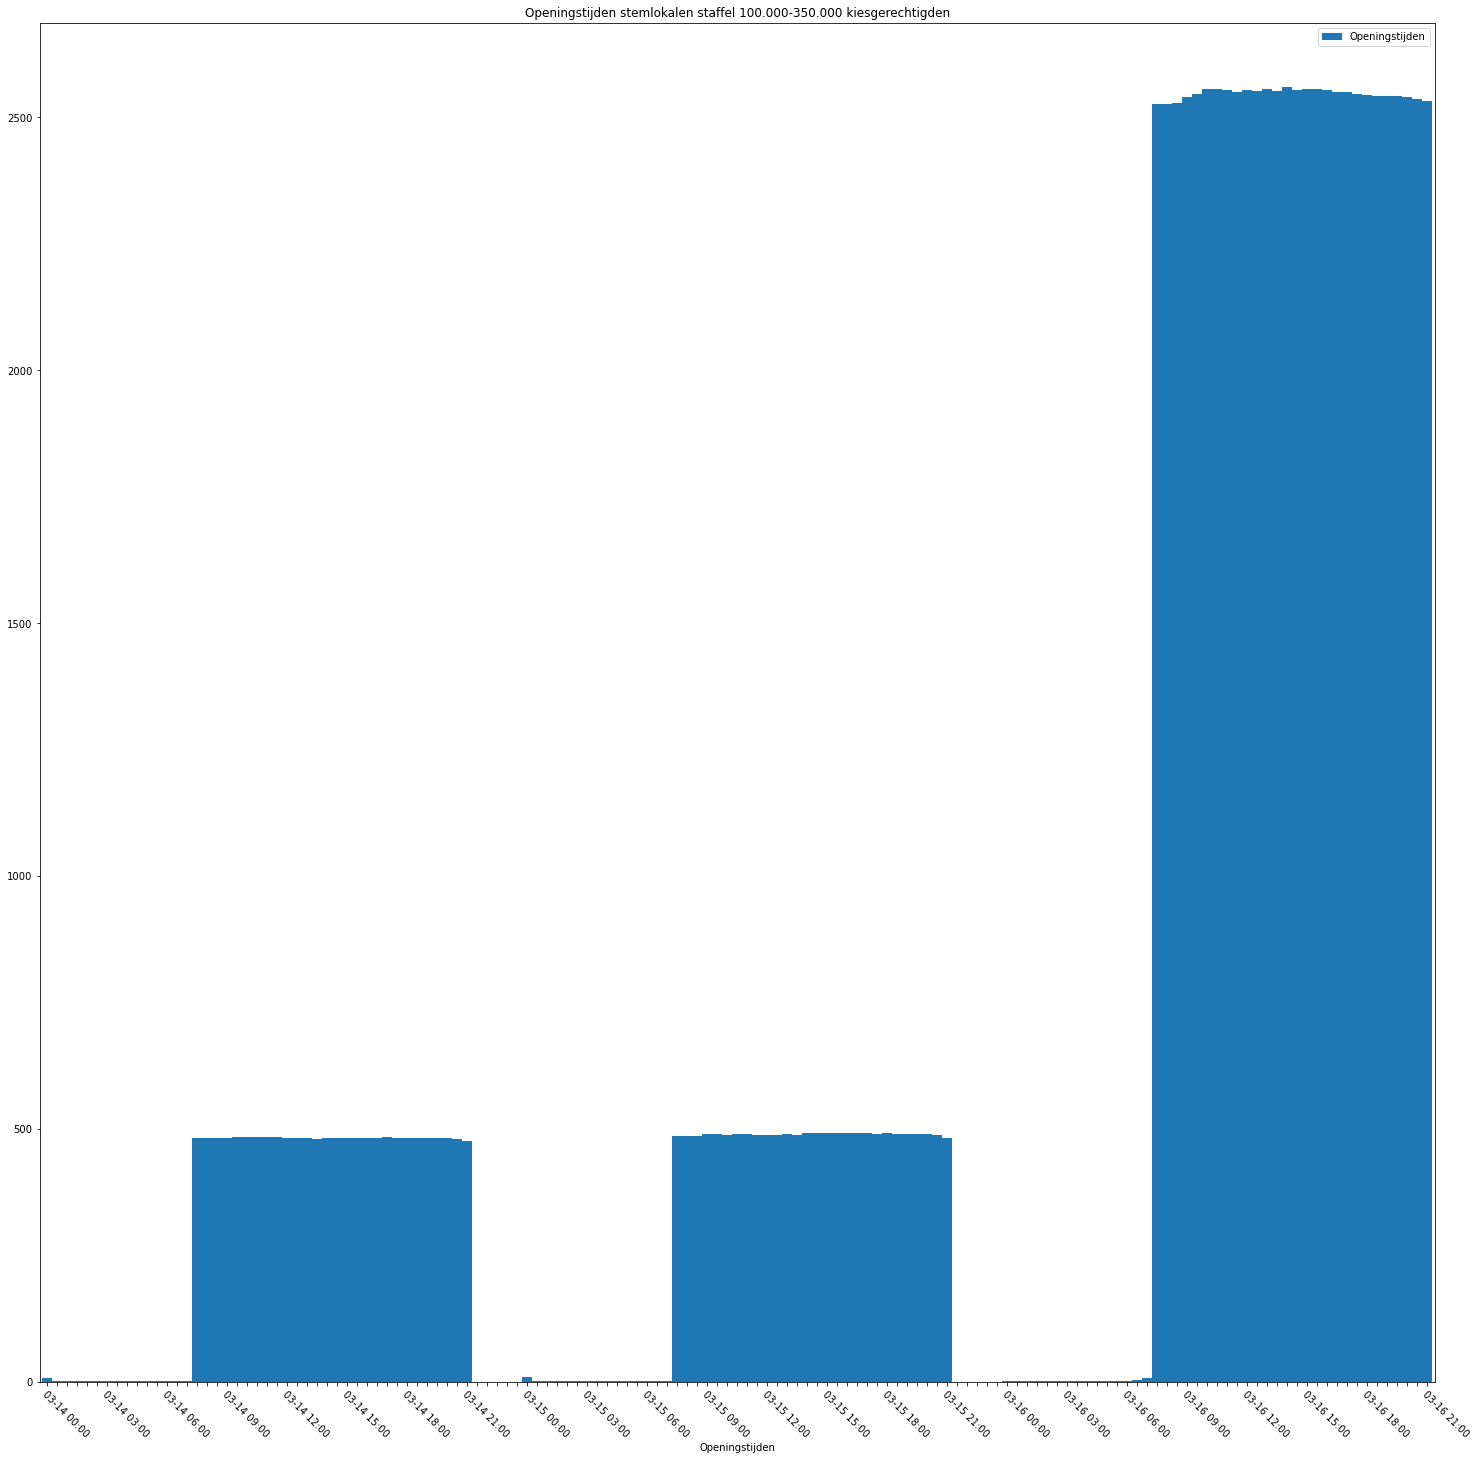

<Figure size 936x936 with 0 Axes>

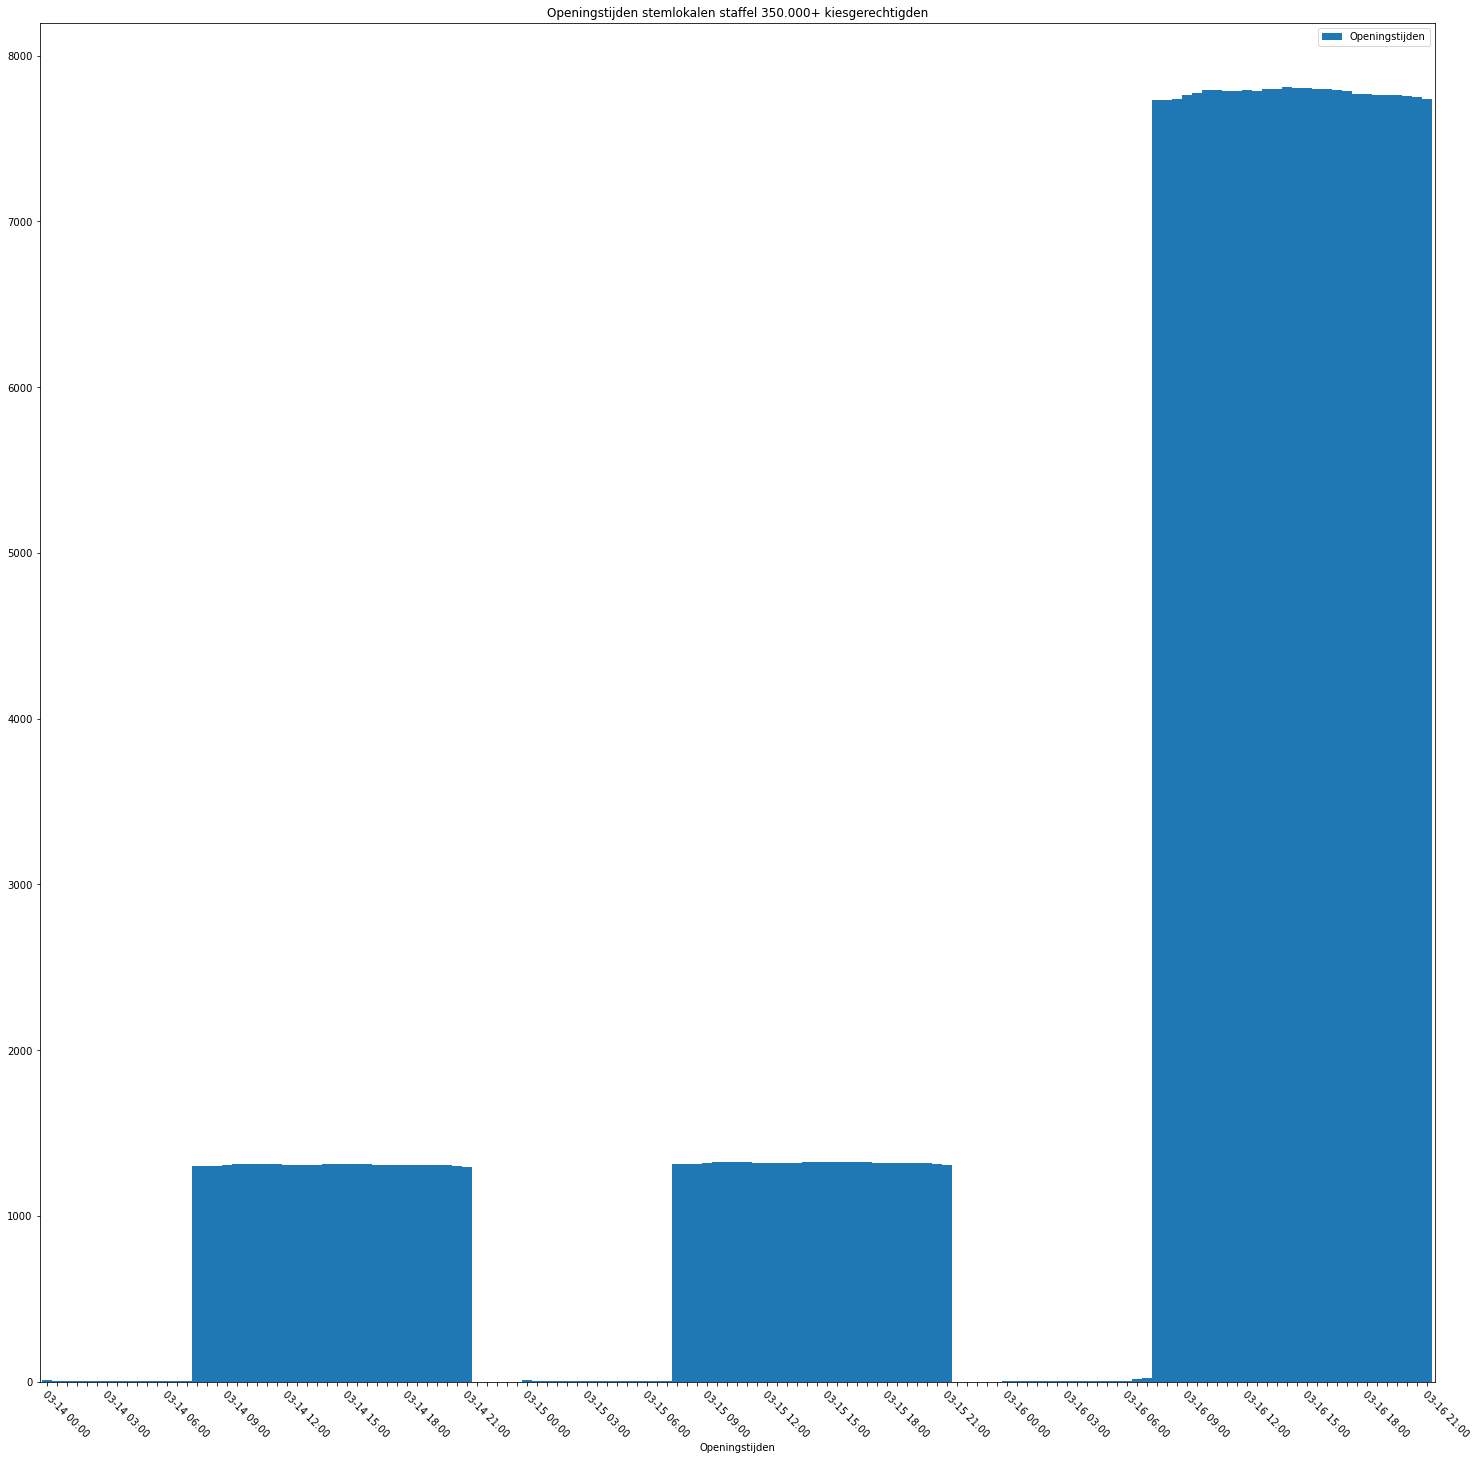

In [134]:
def filter_binned(df1, df2):
    return df1[df1['CBS gemeentecode'].isin(df2['gemeentecode'])]

def make_graphs_opening(label):
    df_stemger_label = df_stemger_clean[df_stemger_clean['binned'].str.contains(label)]
    #df_stemger_label.head()
    graph_wims = filter_binned(gdf_wims_dedupe, df_stemger_label)
    graph_wims_split = filter_binned(gdf_wims_split, df_stemger_label)
    plot_opening(graph_wims_split, label)
    
    
for label in labels:
    make_graphs_opening(label)

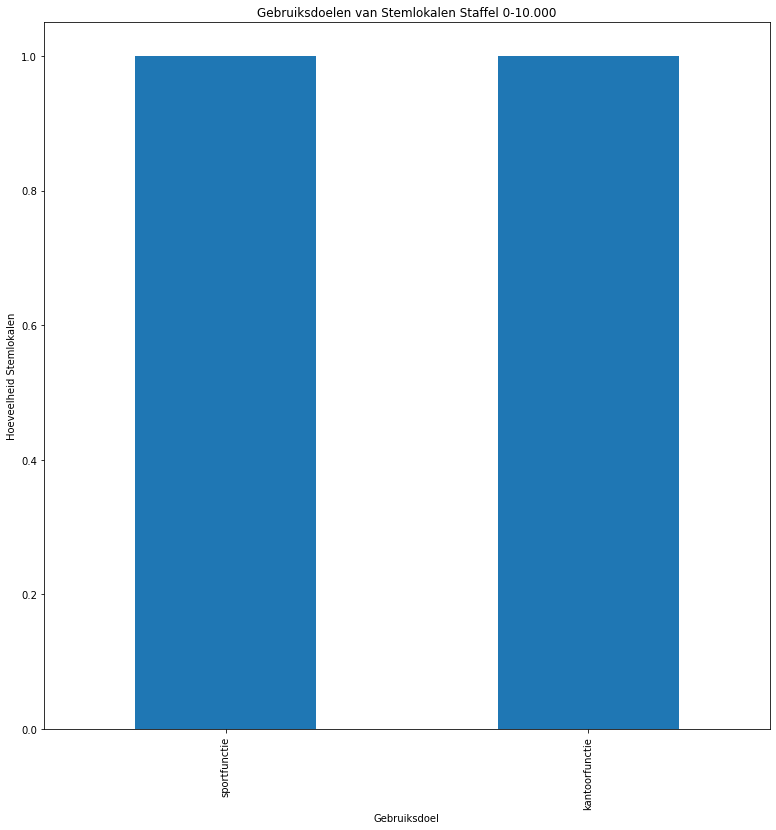

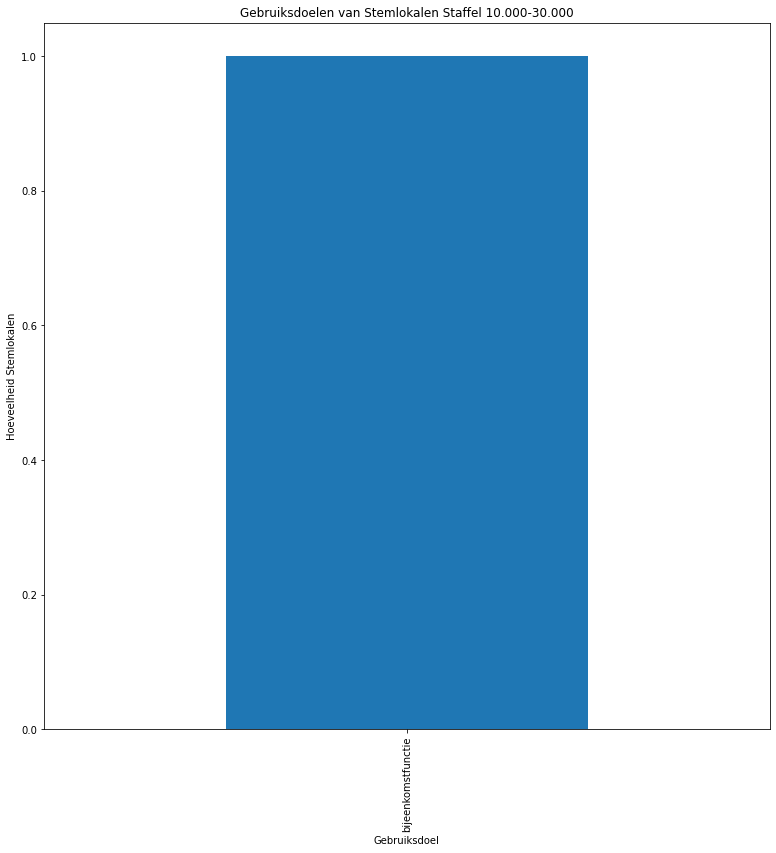

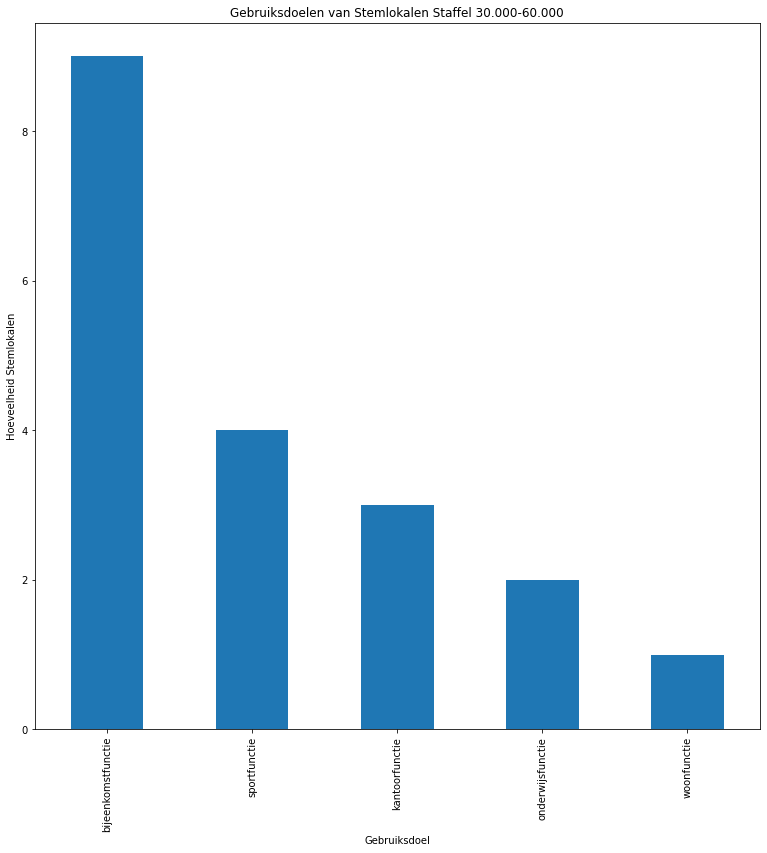

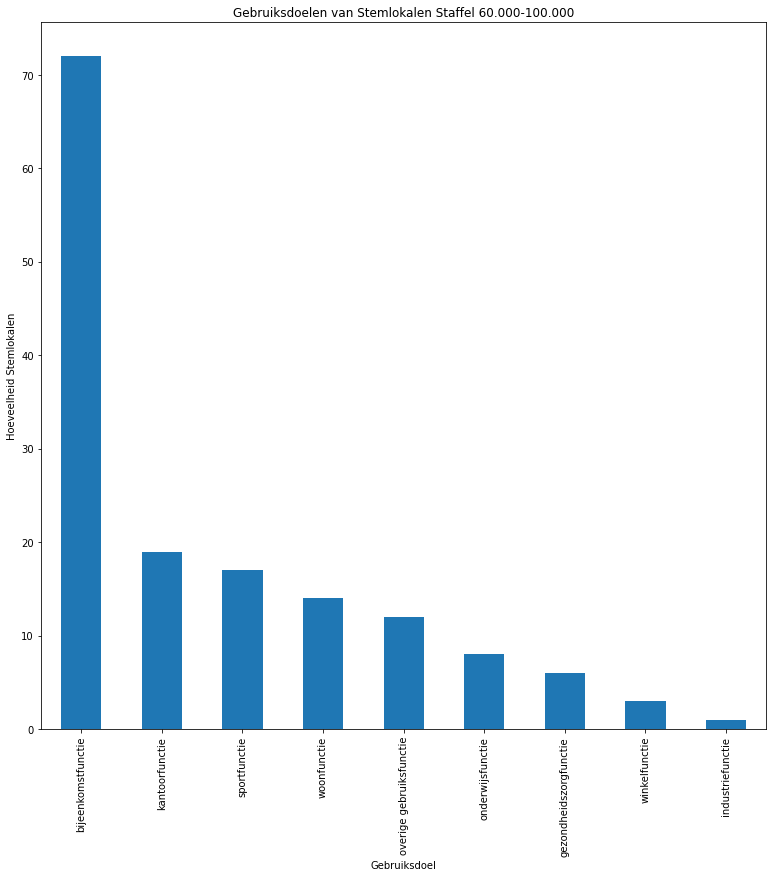

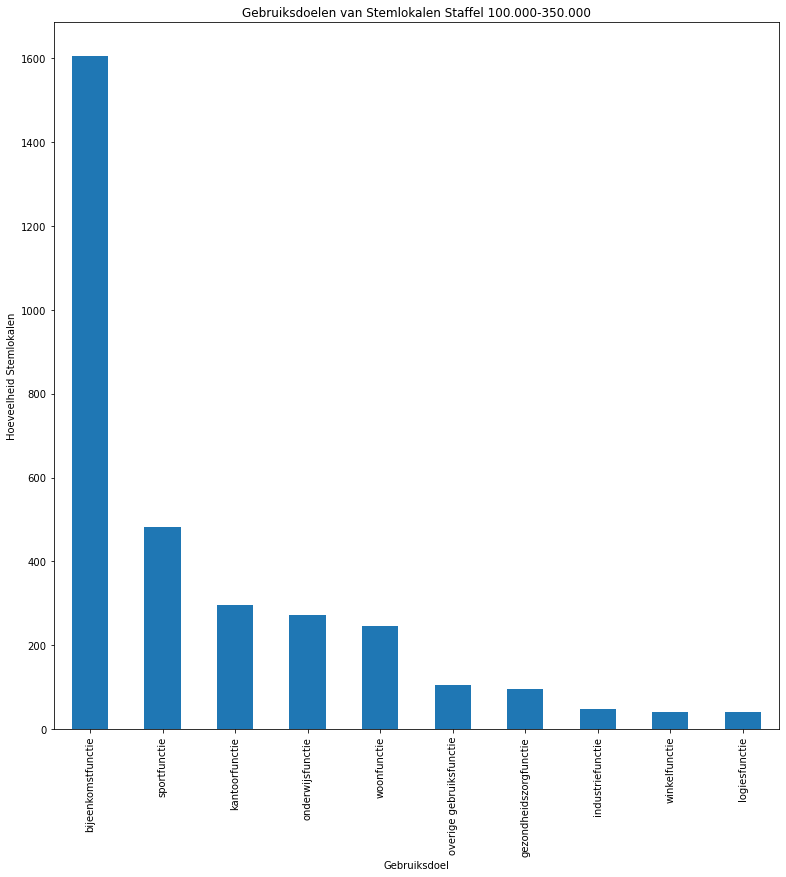

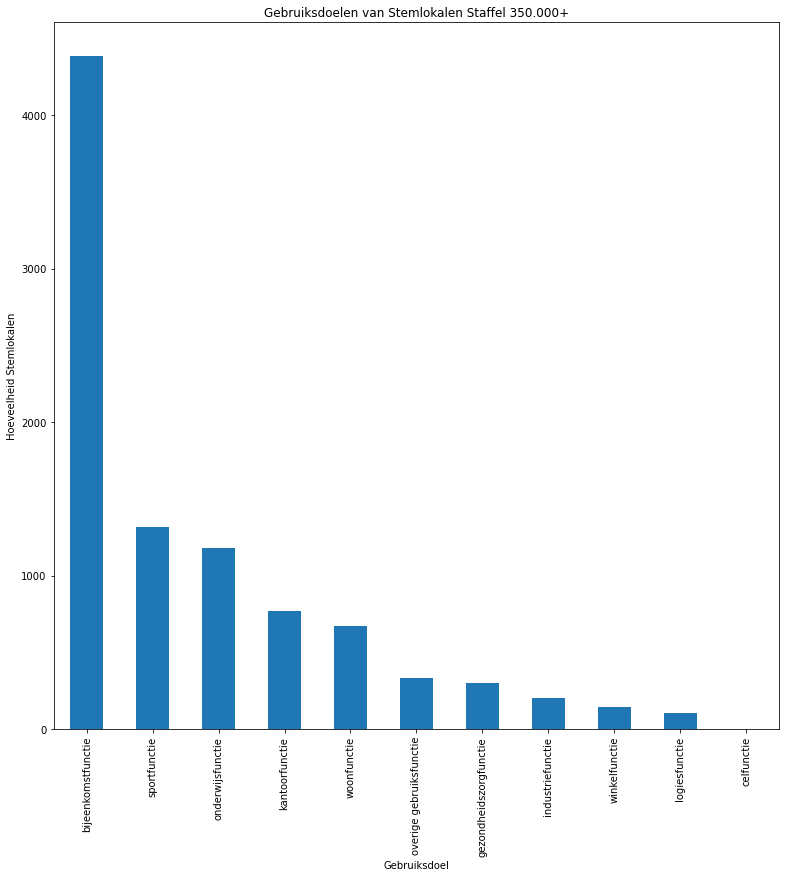

In [133]:
def make_graphs_use(label):
    df_stemger_label = df_stemger_clean[df_stemger_clean['binned'].str.contains(label)]
    plot_use(filter_binned(gdf_wims_dedupe, df_stemger_label), label)

for label in labels:
    make_graphs_use(label)

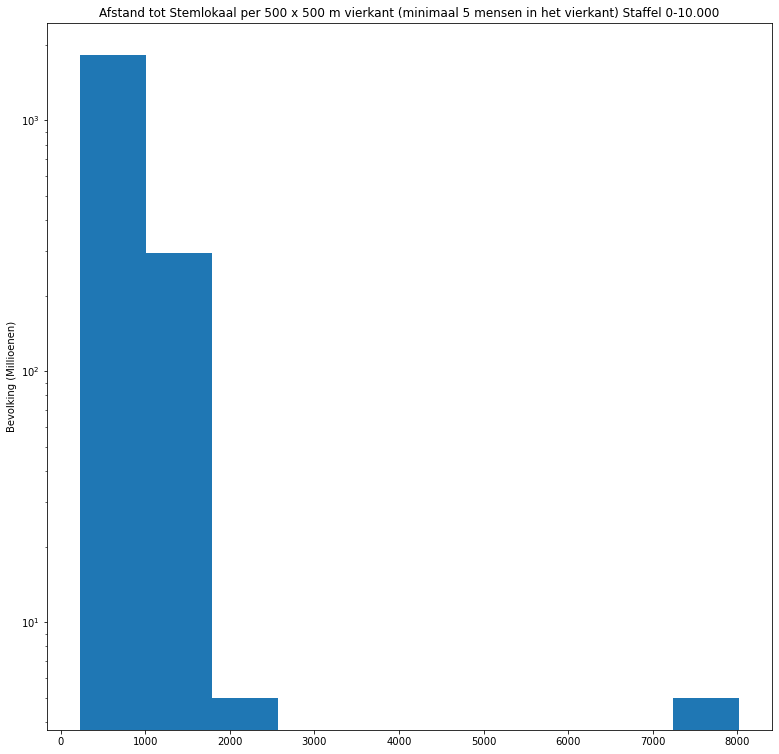

<Figure size 936x936 with 0 Axes>

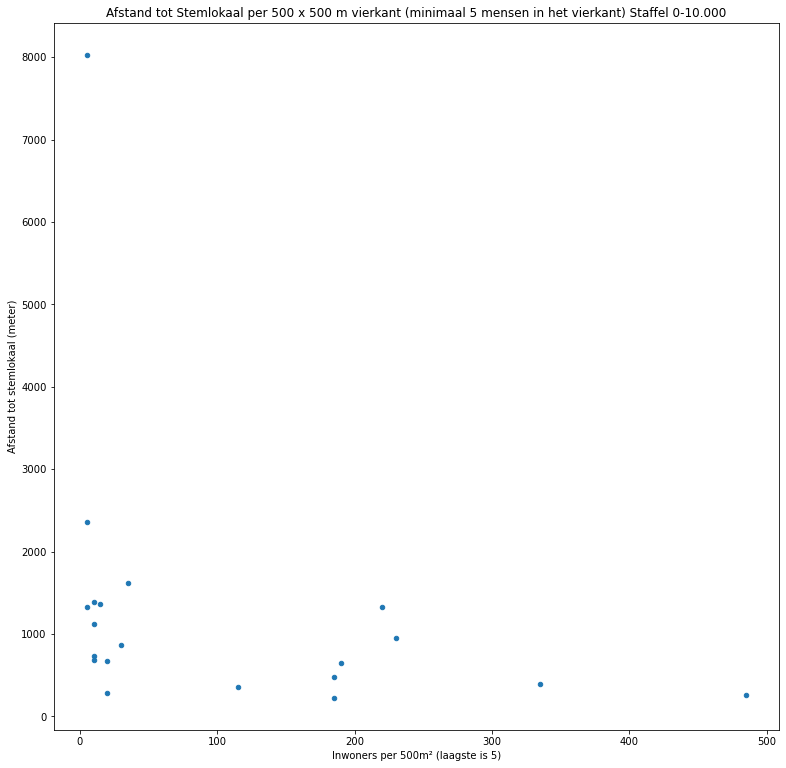

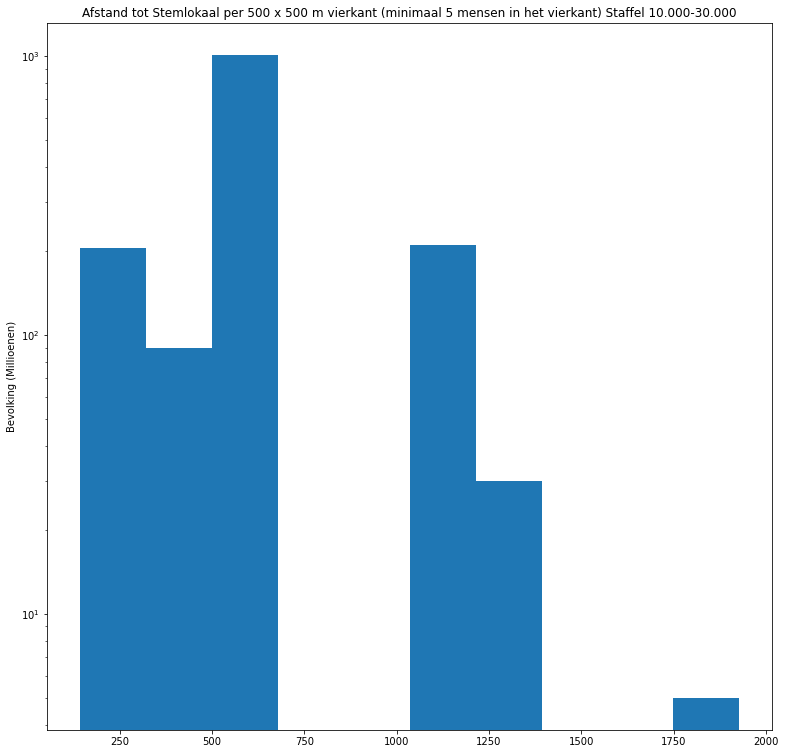

<Figure size 936x936 with 0 Axes>

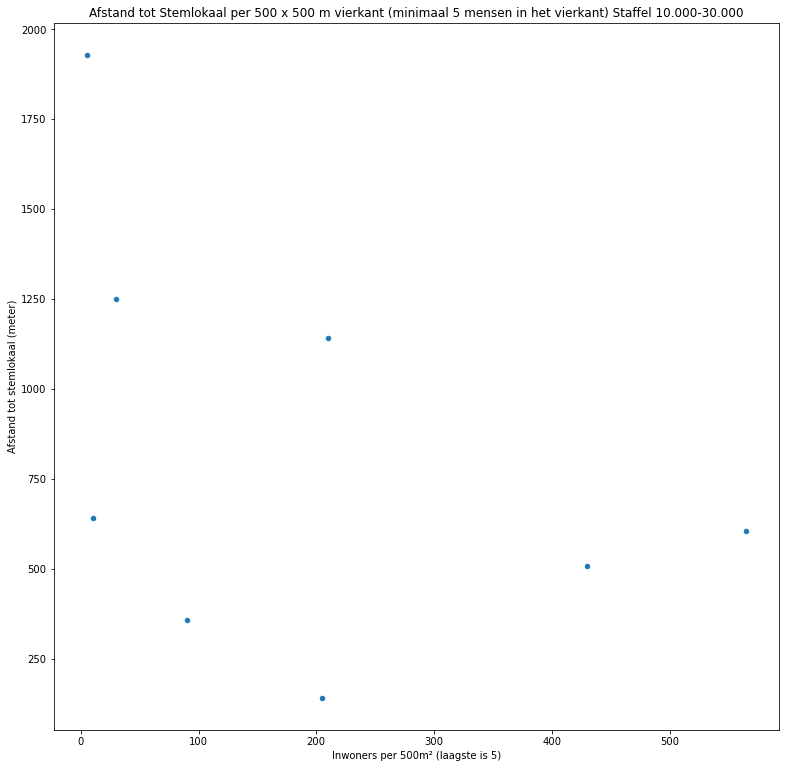

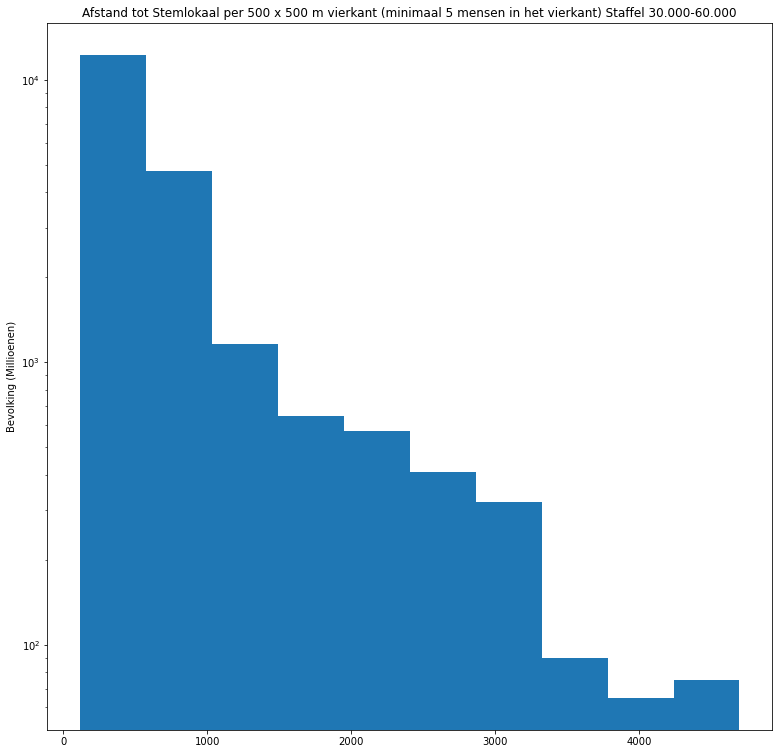

<Figure size 936x936 with 0 Axes>

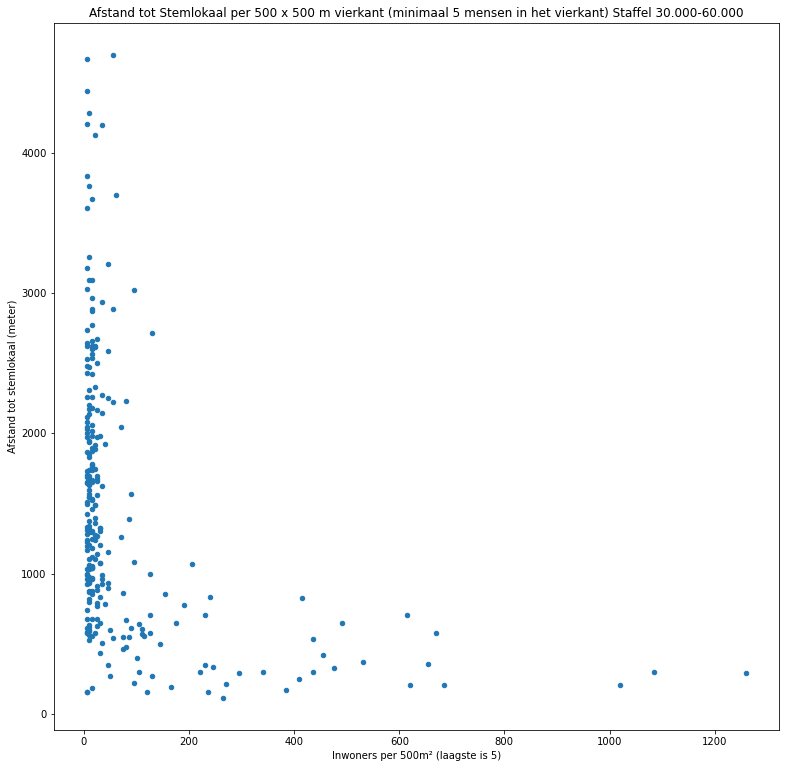

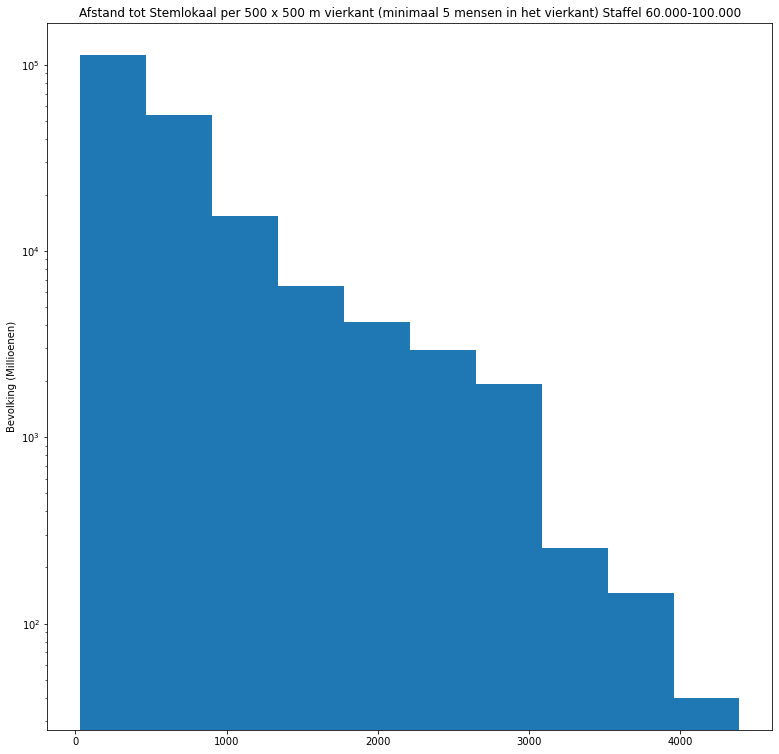

<Figure size 936x936 with 0 Axes>

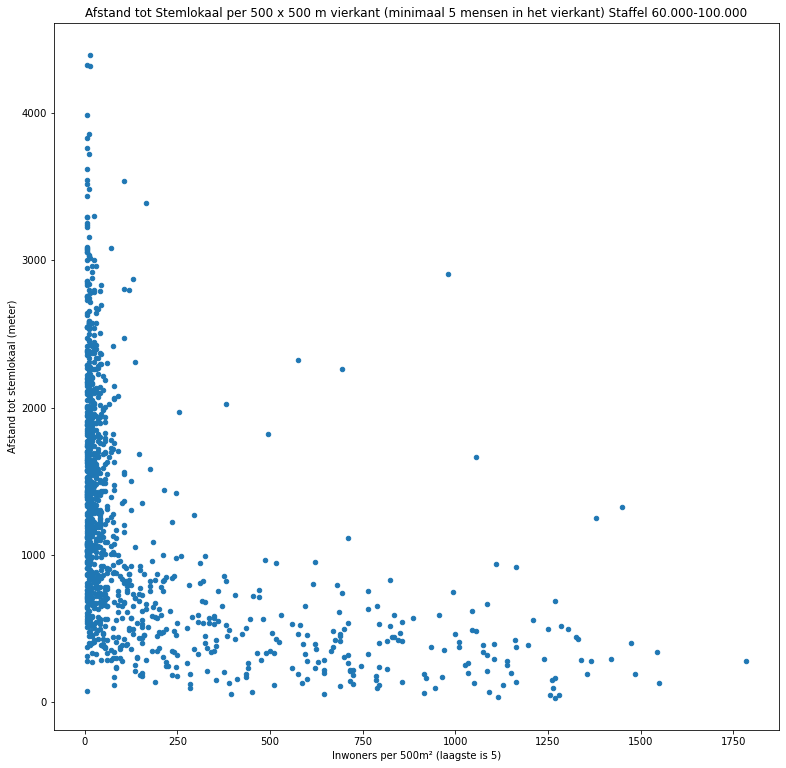

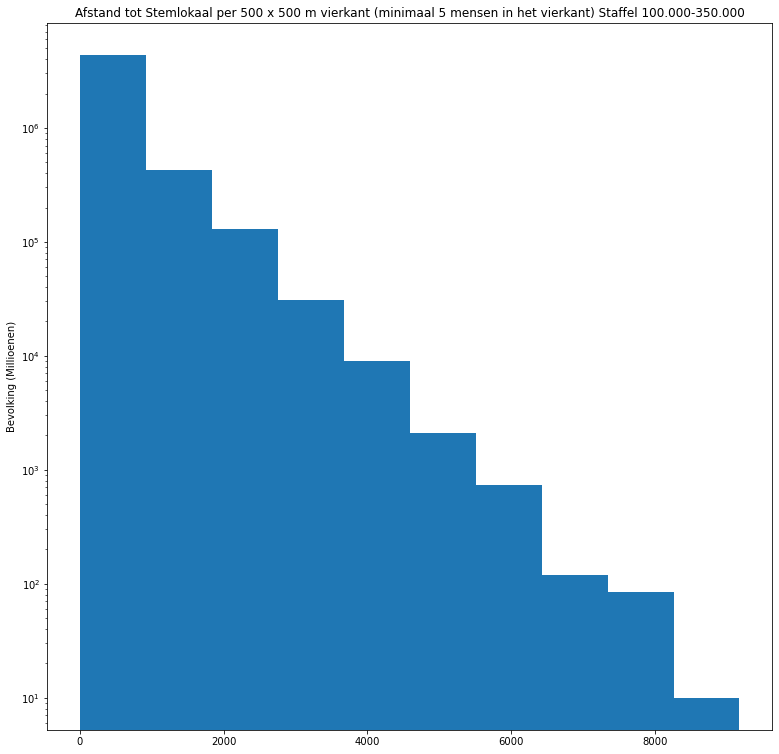

<Figure size 936x936 with 0 Axes>

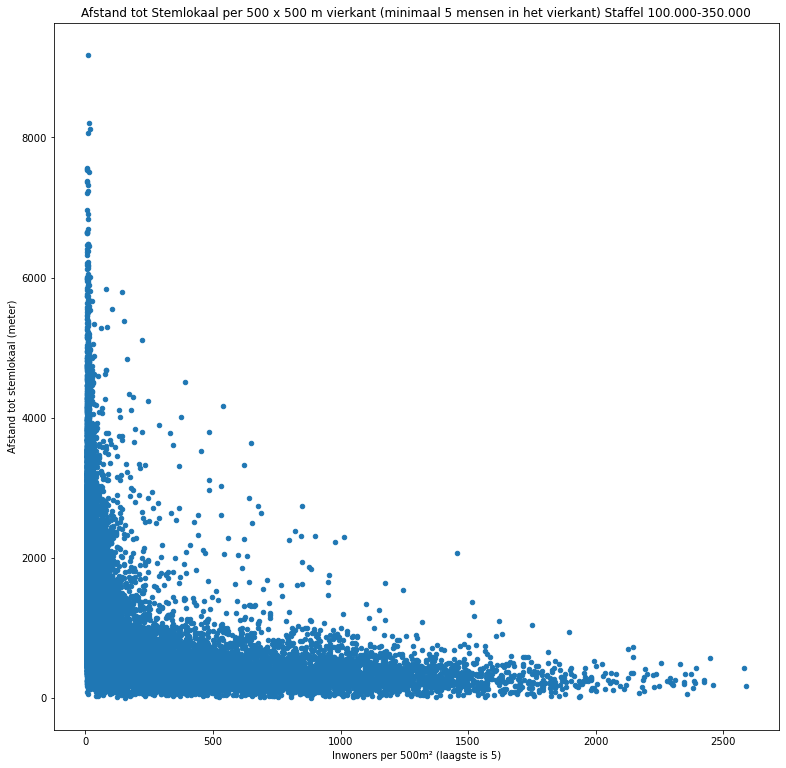

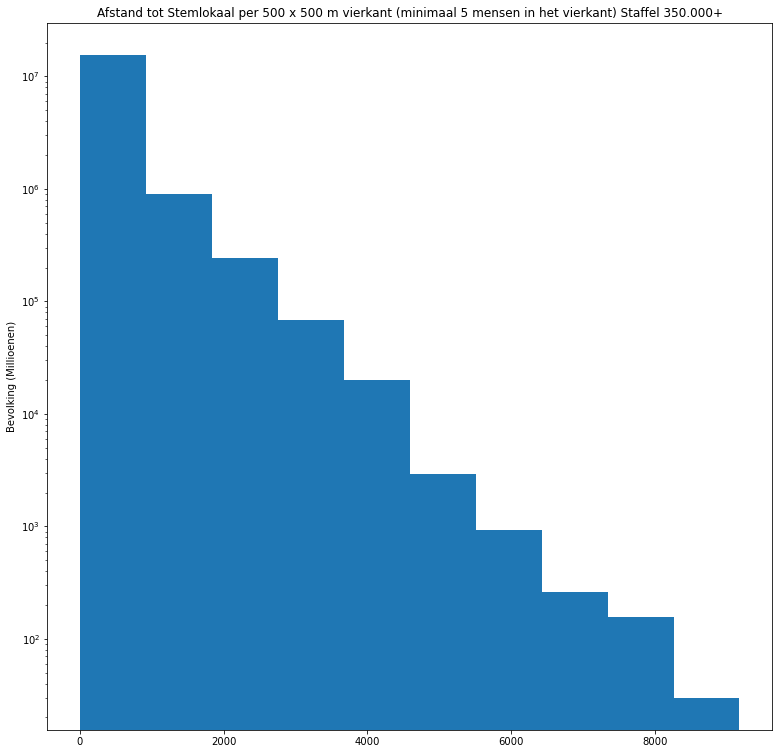

<Figure size 936x936 with 0 Axes>

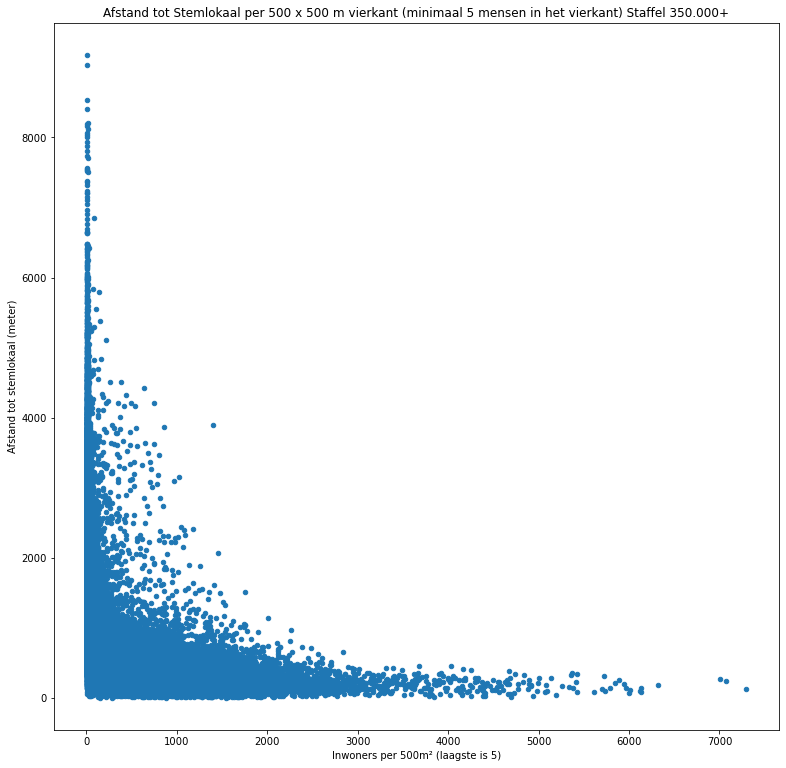

In [143]:
def make_graphs_dist(label):
    df_stemger_label = df_stemger_clean[df_stemger_clean['binned'].str.contains(label)]
    plot_dist(filter_binned(df_nearest, df_stemger_label), label)

for label in labels:
    make_graphs_dist(label)

In [ ]:
#de eerste vijf rijen zijn meta-data en kunnen we gerust weghalen voor nu 
df_gr_gr = pd.read_csv(r'../data/stemmen/01_Groningen/osv4-3_telling_gr2022_groningen.csv', skiprows=5, header=None, delimiter=';')
print(df_gr_gr)

              0                    1           2                3       4    \
0     Lijstnummer           Aanduiding  Volgnummer   Naam kandidaat  Totaal   
1    Gebiednummer                  NaN         NaN              NaN     NaN   
2        Postcode                  NaN         NaN              NaN     NaN   
3             NaN         opgeroepenen         NaN              NaN  194113   
4             NaN      geldige stempas         NaN              NaN   96830   
..            ...                  ...         ...              ...     ...   
445           NaN                  NaN           5     Oetomo, A.D.      38   
446           NaN                  NaN           6         Smid, D.      25   
447           NaN                  NaN           7  van Welij, P.Z.      10   
448            16  Blanco (Dokter, T.)         NaN              NaN     100   
449           NaN                  NaN           1       Dokter, T.     100   

                                5    \
0    GRID Gr

De data is heel gecompliceerd, dus we moeten het bruikbaar maken in pandas. Met hoe de data eruit ziet in een CSV in libre office willen we een constructie maken van de verschillende onderdelen. We hebben de data van de stemlokalen apart al, die kunnen we dus negeren. We willen de data van de lijsten apart hebben. 

In [ ]:

#TODO:mobiele stemlokalen eruit filteren die NIET 0,0 zijn
#TODO:datastandaard duitse verkiezingen stemlokaalafstand opzoeken